In [17]:
from IPython import display as Display
import os
import ultralytics
import glob
from roboflow import Roboflow
from IPython.display import Image, display
from ultralytics import YOLO
Display.clear_output()
HOME = "../bball_detect"

In [5]:
!nvidia-smi

Wed Jul 26 13:42:38 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.03              Driver Version: 535.54.03    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           On  | 00000000:1C:00.0 Off |                    0 |
| N/A   35C    P0              56W / 300W |   4687MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
# rf = Roboflow(api_key="nz2w1UFnyFrM7e73WOzh")
# project = rf.workspace("nyu-figsb").project("basketballdetection-cki6r")
# dataset = project.version(10).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.142, to fix: `pip install ultralytics==8.0.134`

Extracting Dataset Version Zip to basketballDetection-10 in yolov8:: 100%|██████████| 2692/2692 [00:20<00:00, 133.74it/s] 


In [9]:
model = YOLO("../bball_detect/runs/detect/train6/weights/last.pt")
temp = model.train(data='../basketballDetection-10/data.yaml', epochs=120, workers = 1, resume = True)

Ultralytics YOLOv8.0.142 🚀 Python-3.11.4 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=../bball_detect/runs/detect/train6/weights/last.pt, data=../basketballDetection-10/data.yaml, epochs=120, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=1, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torc

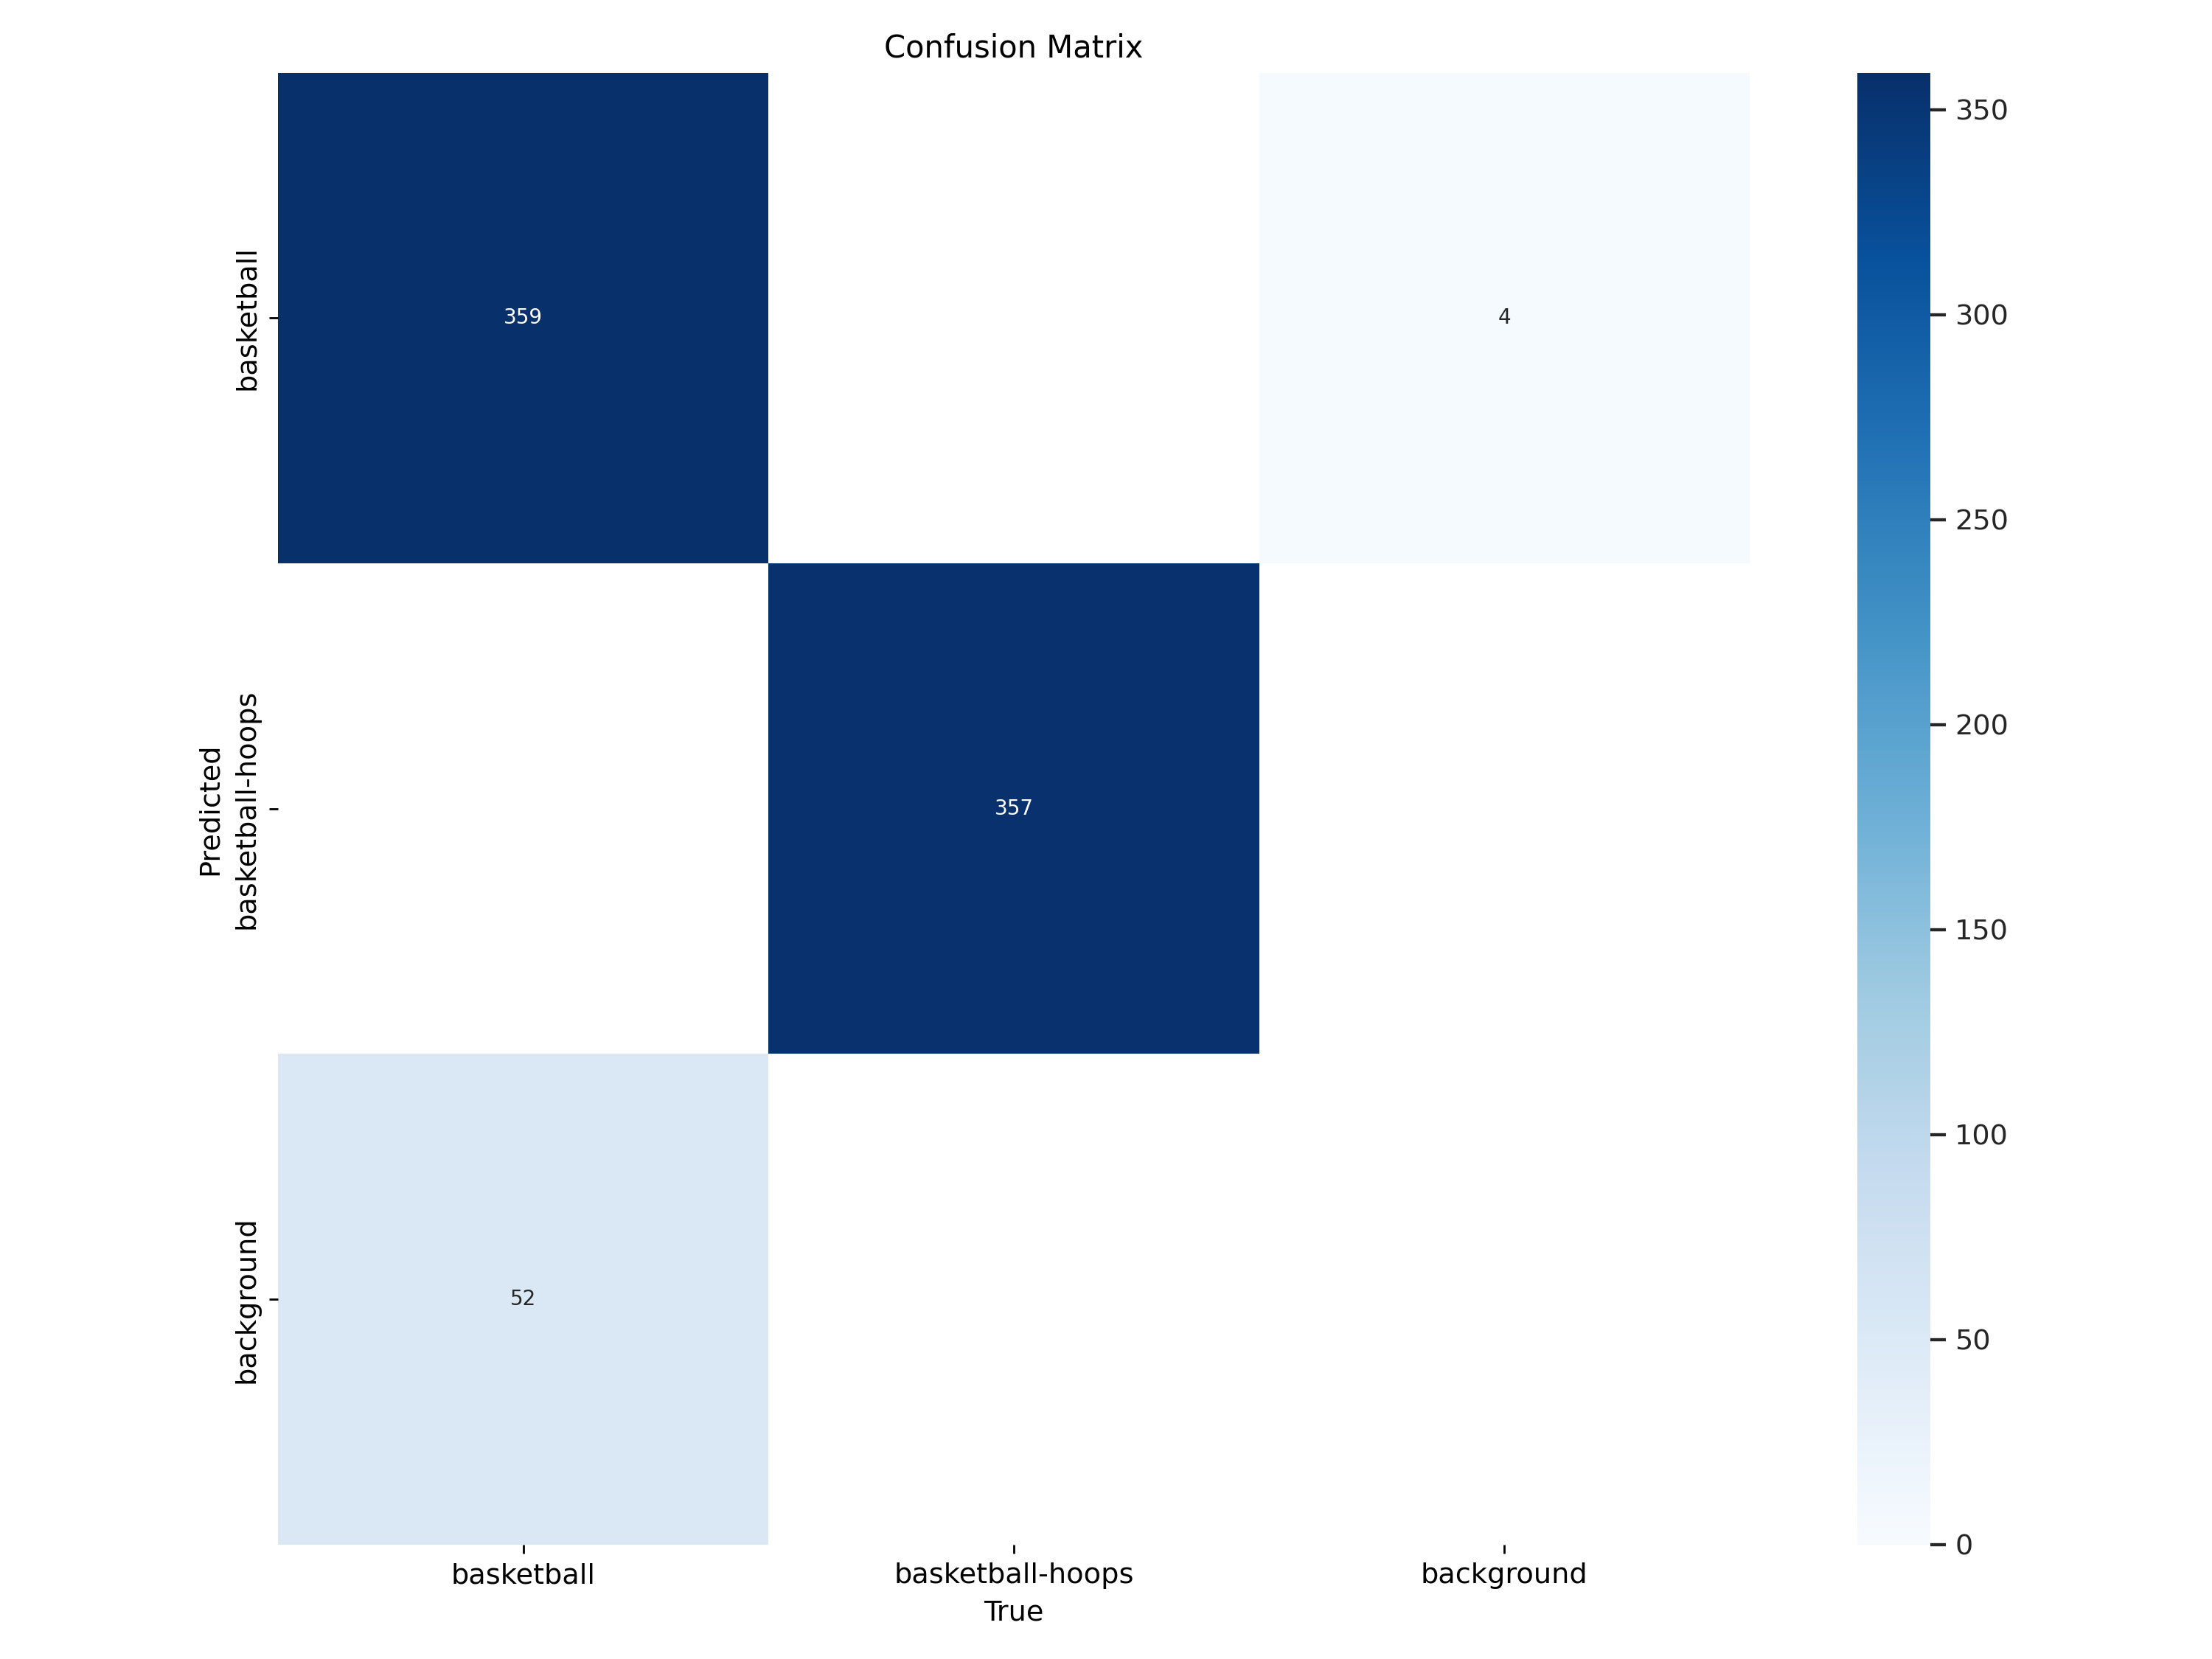

In [14]:
Image(filename='../bball_detect/runs/detect/train6/confusion_matrix.png', width=800)

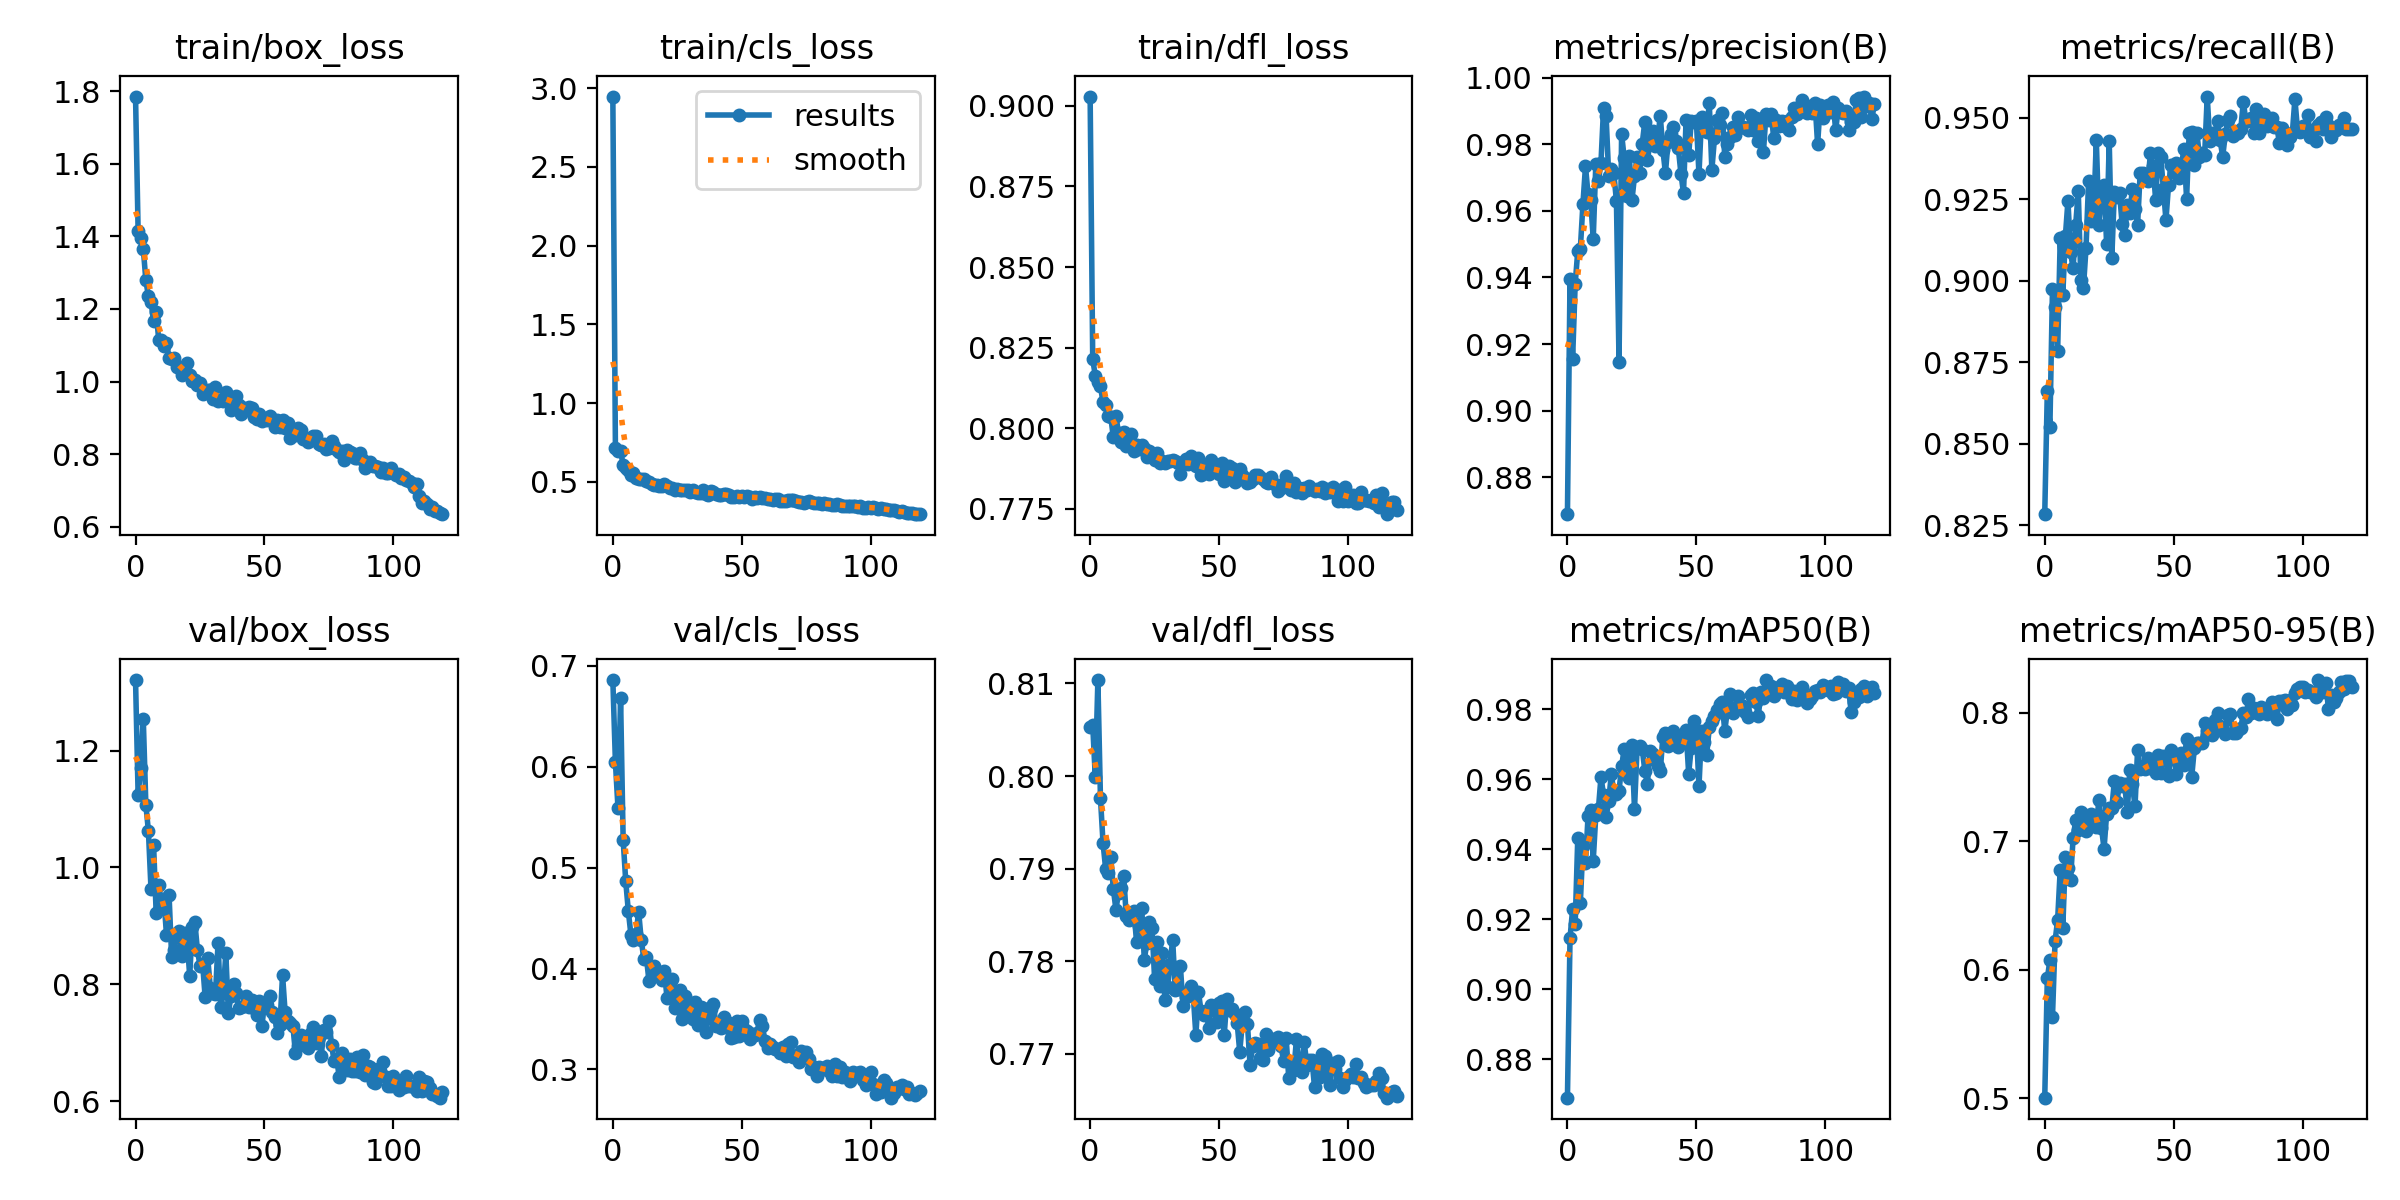

In [19]:
Image(filename=f'{HOME}/runs/detect/train6/results.png', width=1000)

In [23]:
!yolo task=detect mode=val model=../bball_detect/runs/detect/train6/weights/best.pt data='../basketballDetection-10/data.yaml' workers=1

Ultralytics YOLOv8.0.142 🚀 Python-3.11.4 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients
val: Scanning /scratch/zw2688/basketballDetection-10/valid/labels.cache... 119 i
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        119        768      0.989      0.948      0.987      0.842
            basketball        119        411      0.982      0.895      0.978      0.798
      basketball-hoops        119        357      0.997          1      0.995      0.887
Speed: 3.7ms preprocess, 7.1ms inference, 0.0ms loss, 8.9ms postprocess per image
Results saved to runs/detect/val3


In [26]:
!yolo task=detect mode=predict model=../bball_detect/runs/detect/train6/weights/best.pt conf=0.30 source='../basketballDetection-10/test/images' save=True workers=1

Ultralytics YOLOv8.0.142 🚀 Python-3.11.4 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/57 /scratch/zw2688/bball_detect/../basketballDetection-10/test/images/2023_06_21_-_Game_2-xJLCPqvNo00_mp4-18_jpg.rf.1f5239e5d3713526cd47d874ceb7cf5d.jpg: 384x640 1 basketball, 3 basketball-hoopss, 49.4ms
image 2/57 /scratch/zw2688/bball_detect/../basketballDetection-10/test/images/2023_06_21_-_Game_2-xJLCPqvNo00_mp4-19_jpg.rf.98418b0a801780441d1e6403487b3e66.jpg: 384x640 2 basketballs, 3 basketball-hoopss, 5.0ms
image 3/57 /scratch/zw2688/bball_detect/../basketballDetection-10/test/images/2023_06_21_-_Game_2-xJLCPqvNo00_mp4-8_jpg.rf.71edda81b3b781edfc568d53a7fbe7fb.jpg: 384x640 2 basketballs, 3 basketball-hoopss, 4.4ms
image 4/57 /scratch/zw2688/bball_detect/../basketballDetection-10/test/images/2023_06_21_-_Game_9-3JNAviE7Zvw_frame_18_jpg.rf.701bbd1416564476748502a7e08cb87e.jpg: 384x640 2 basketballs, 3 basketba

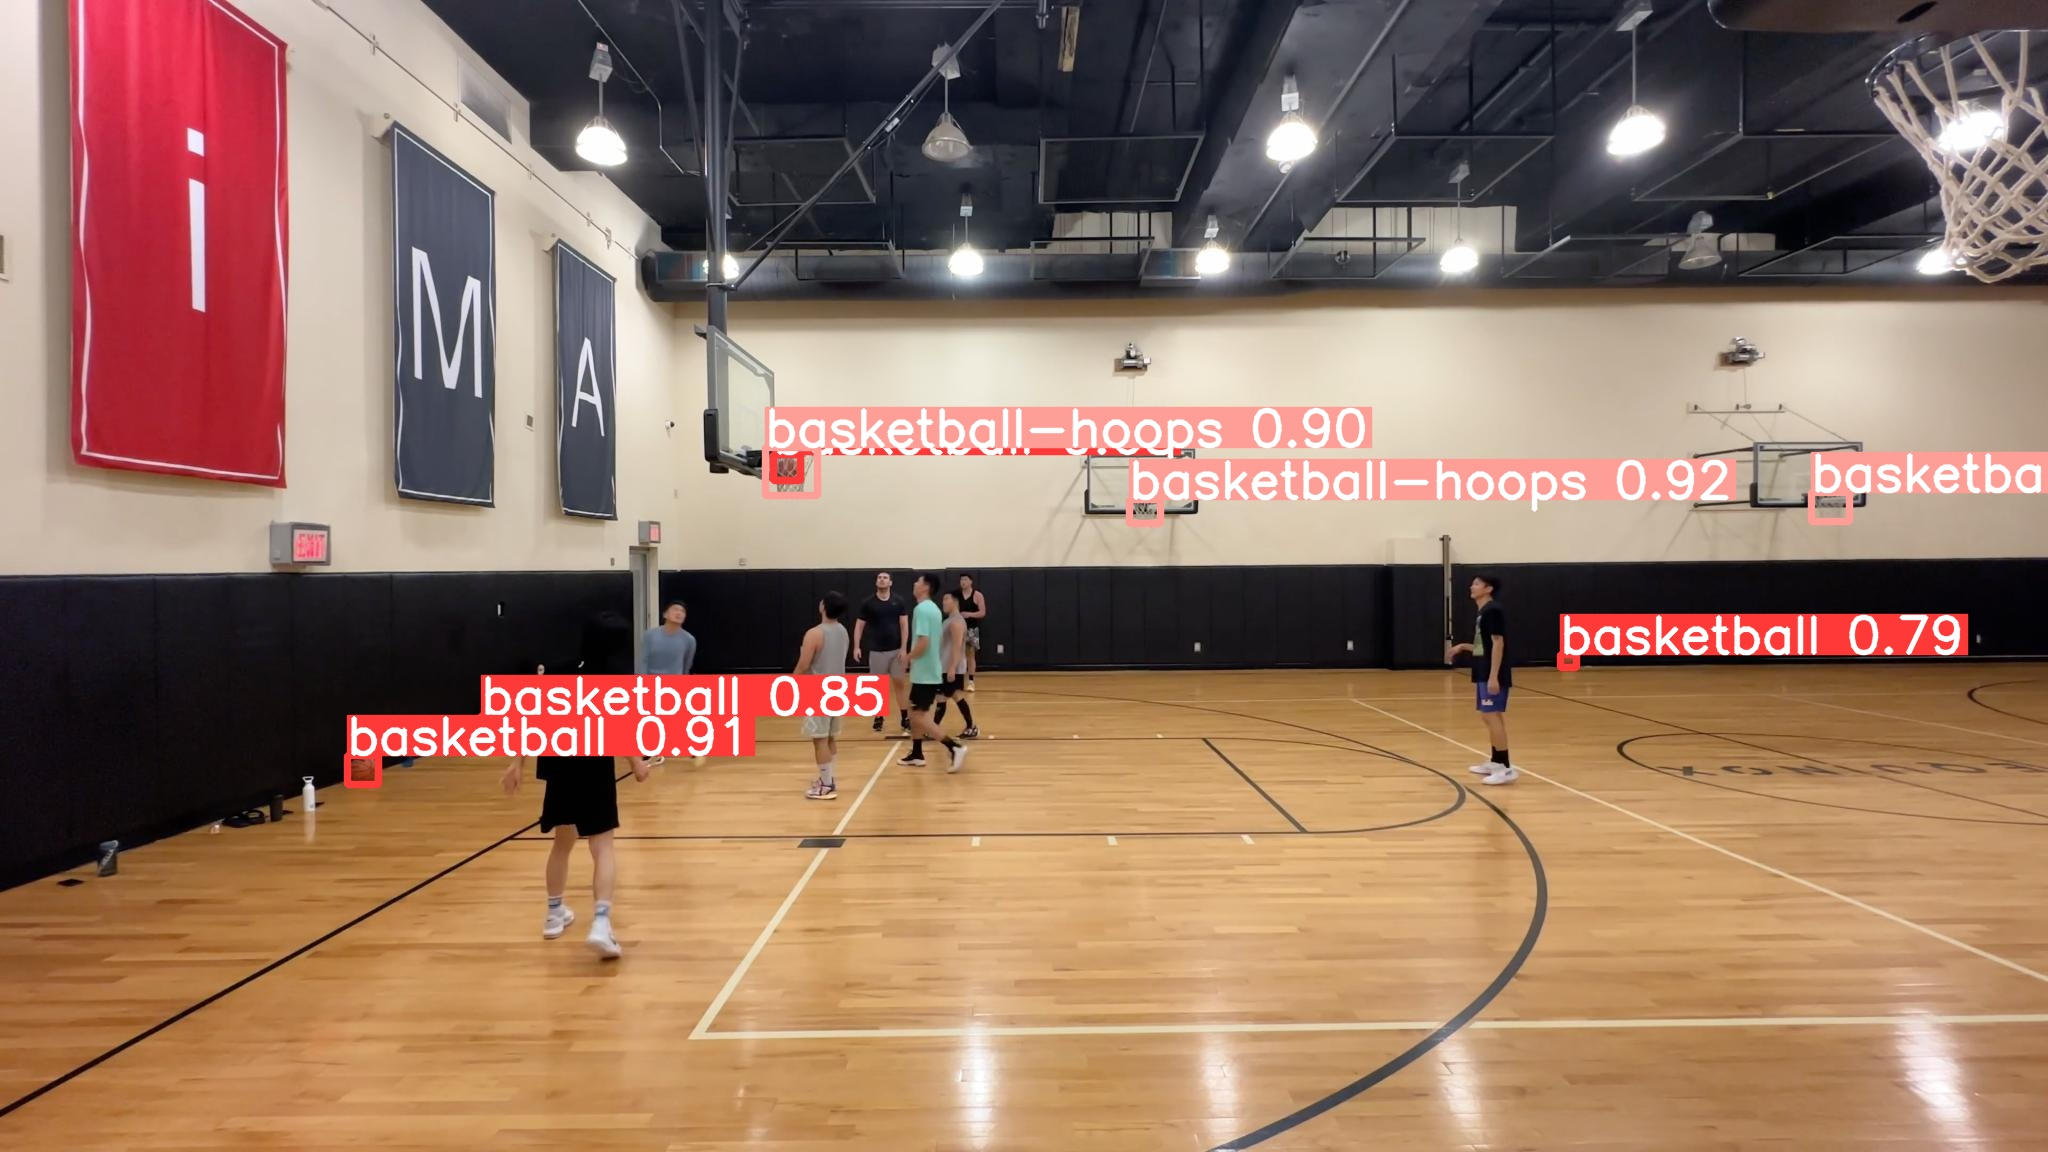

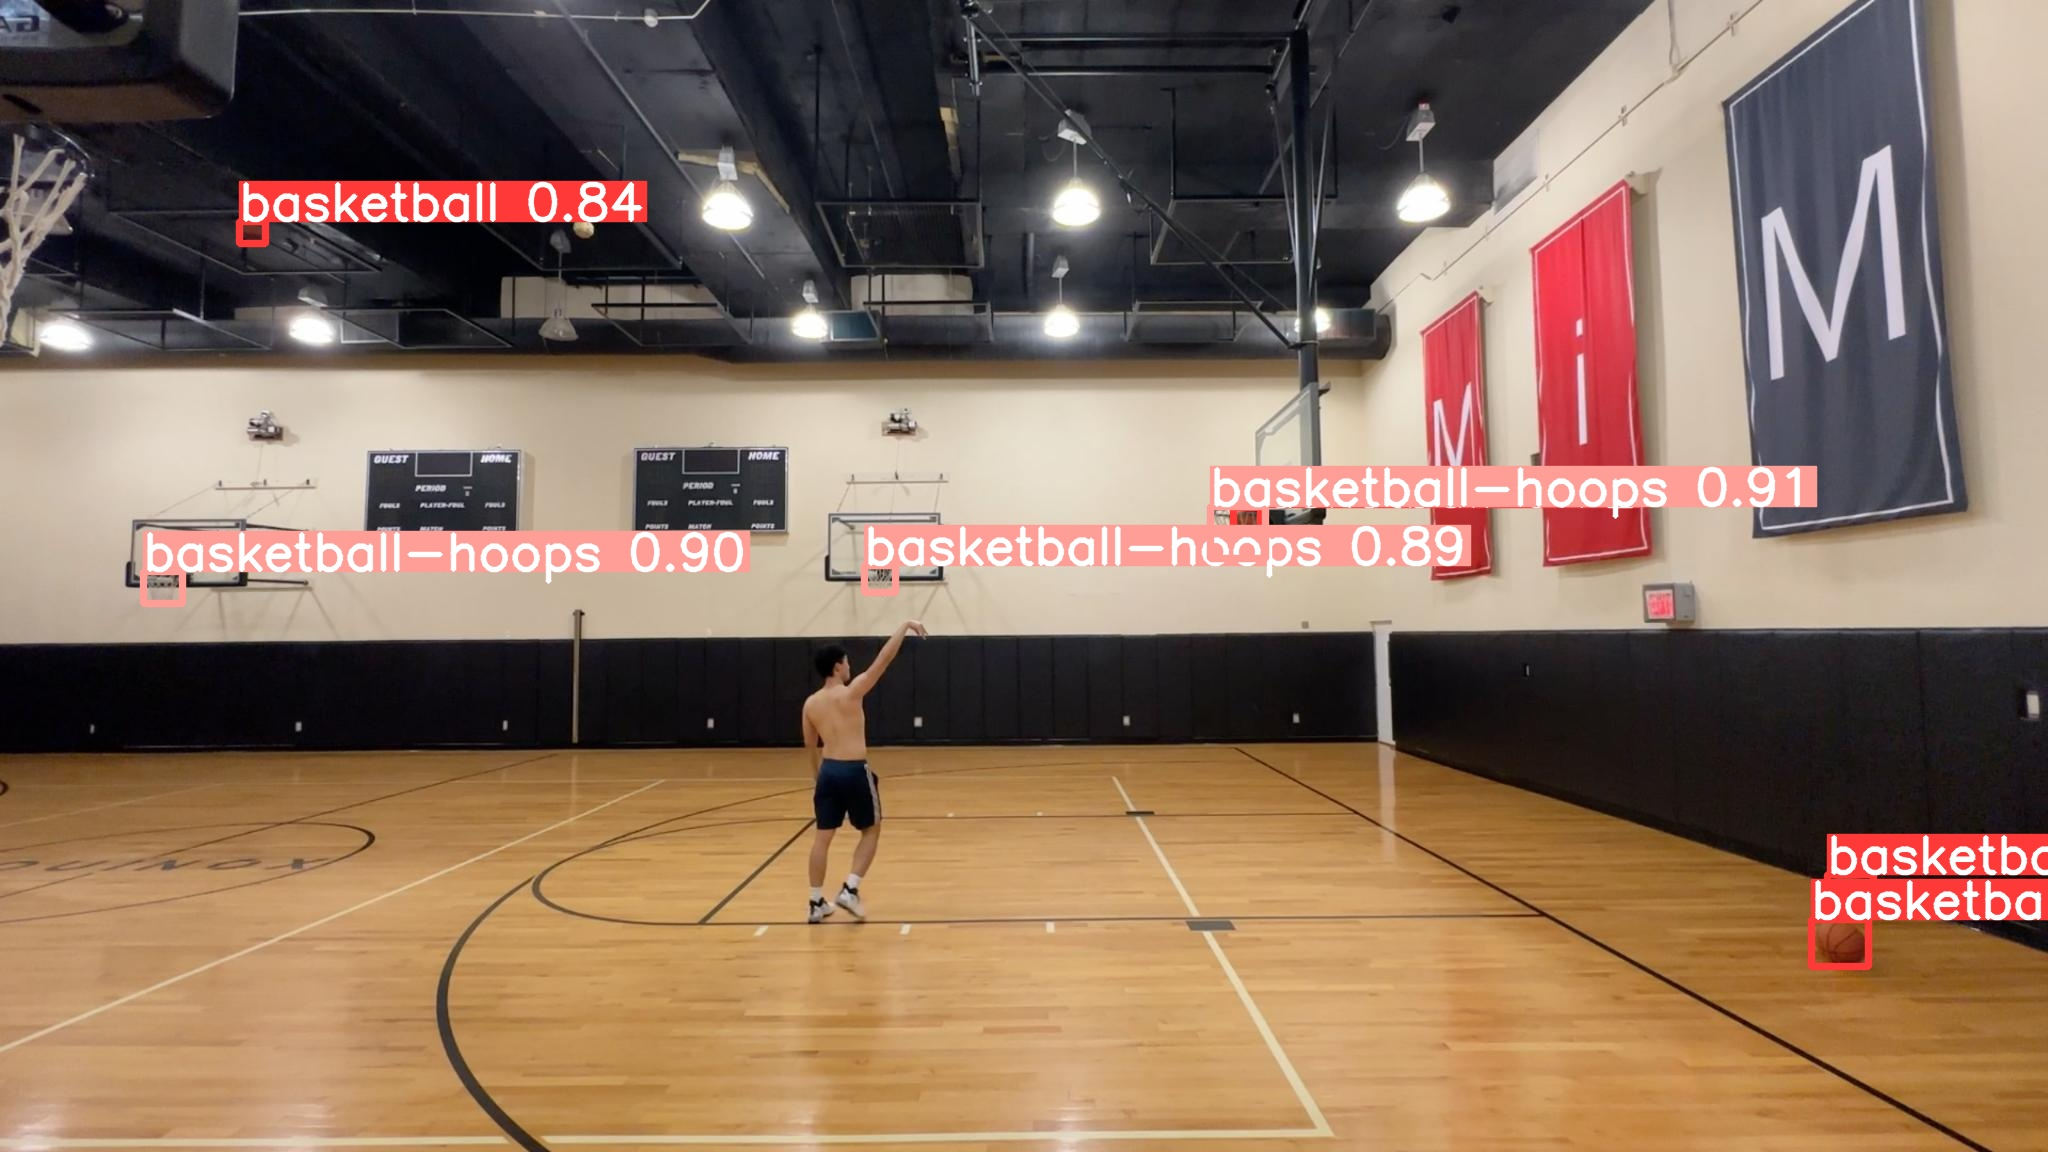

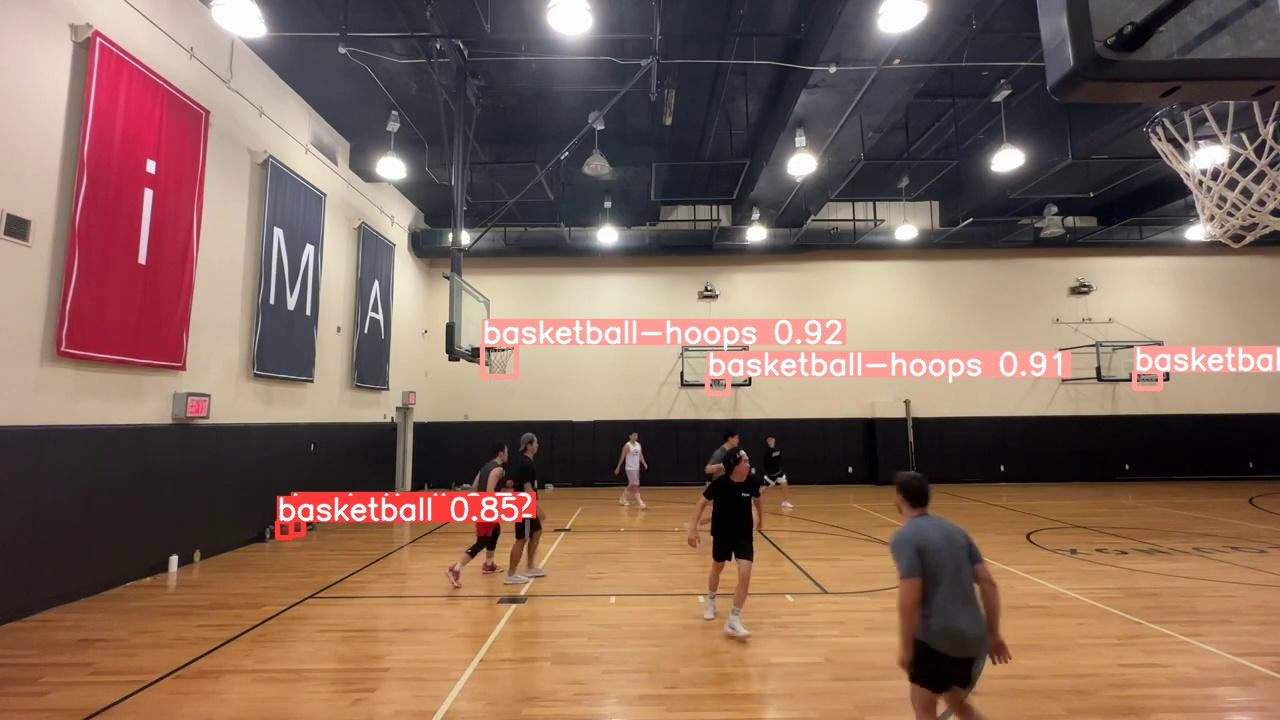

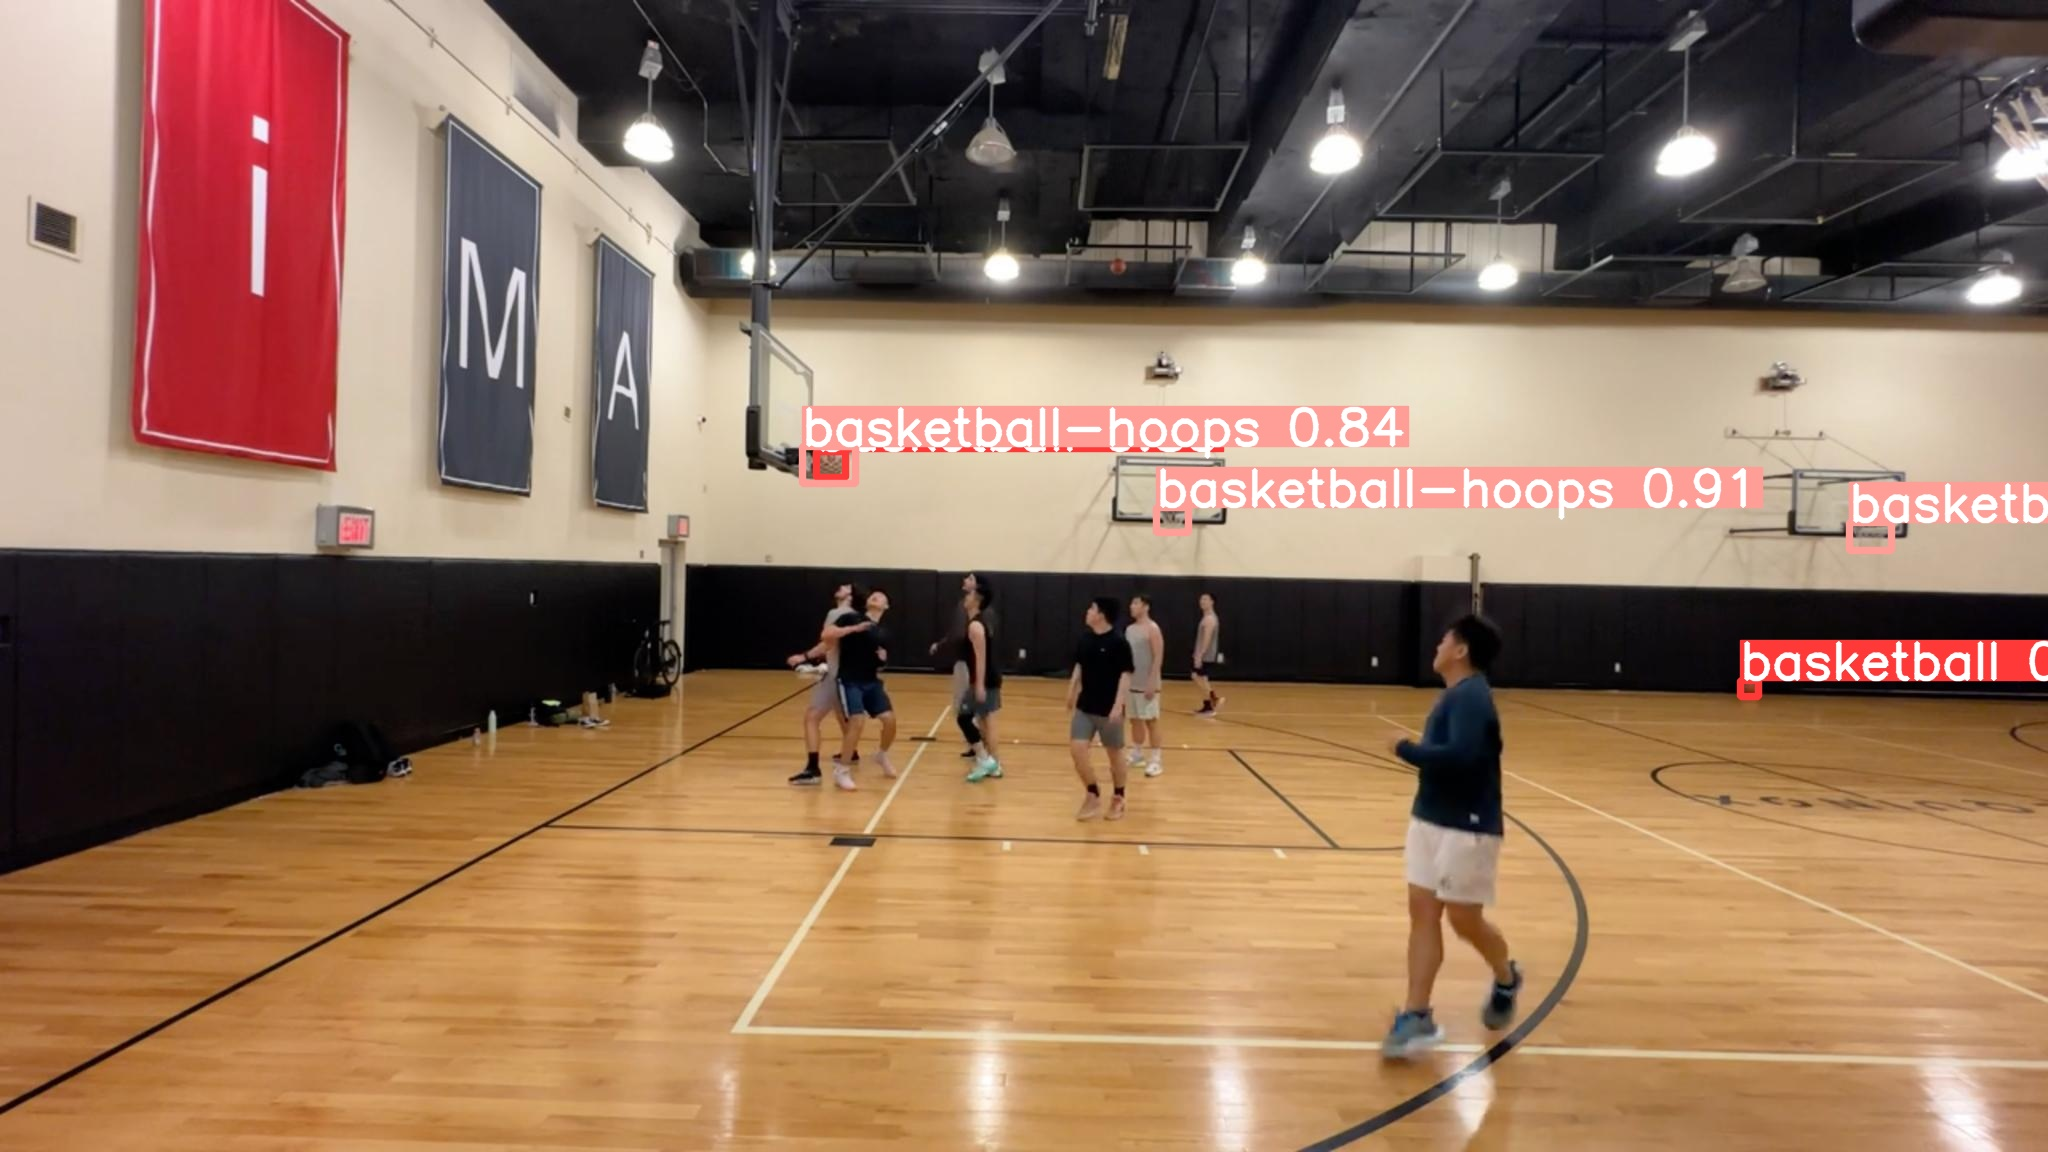

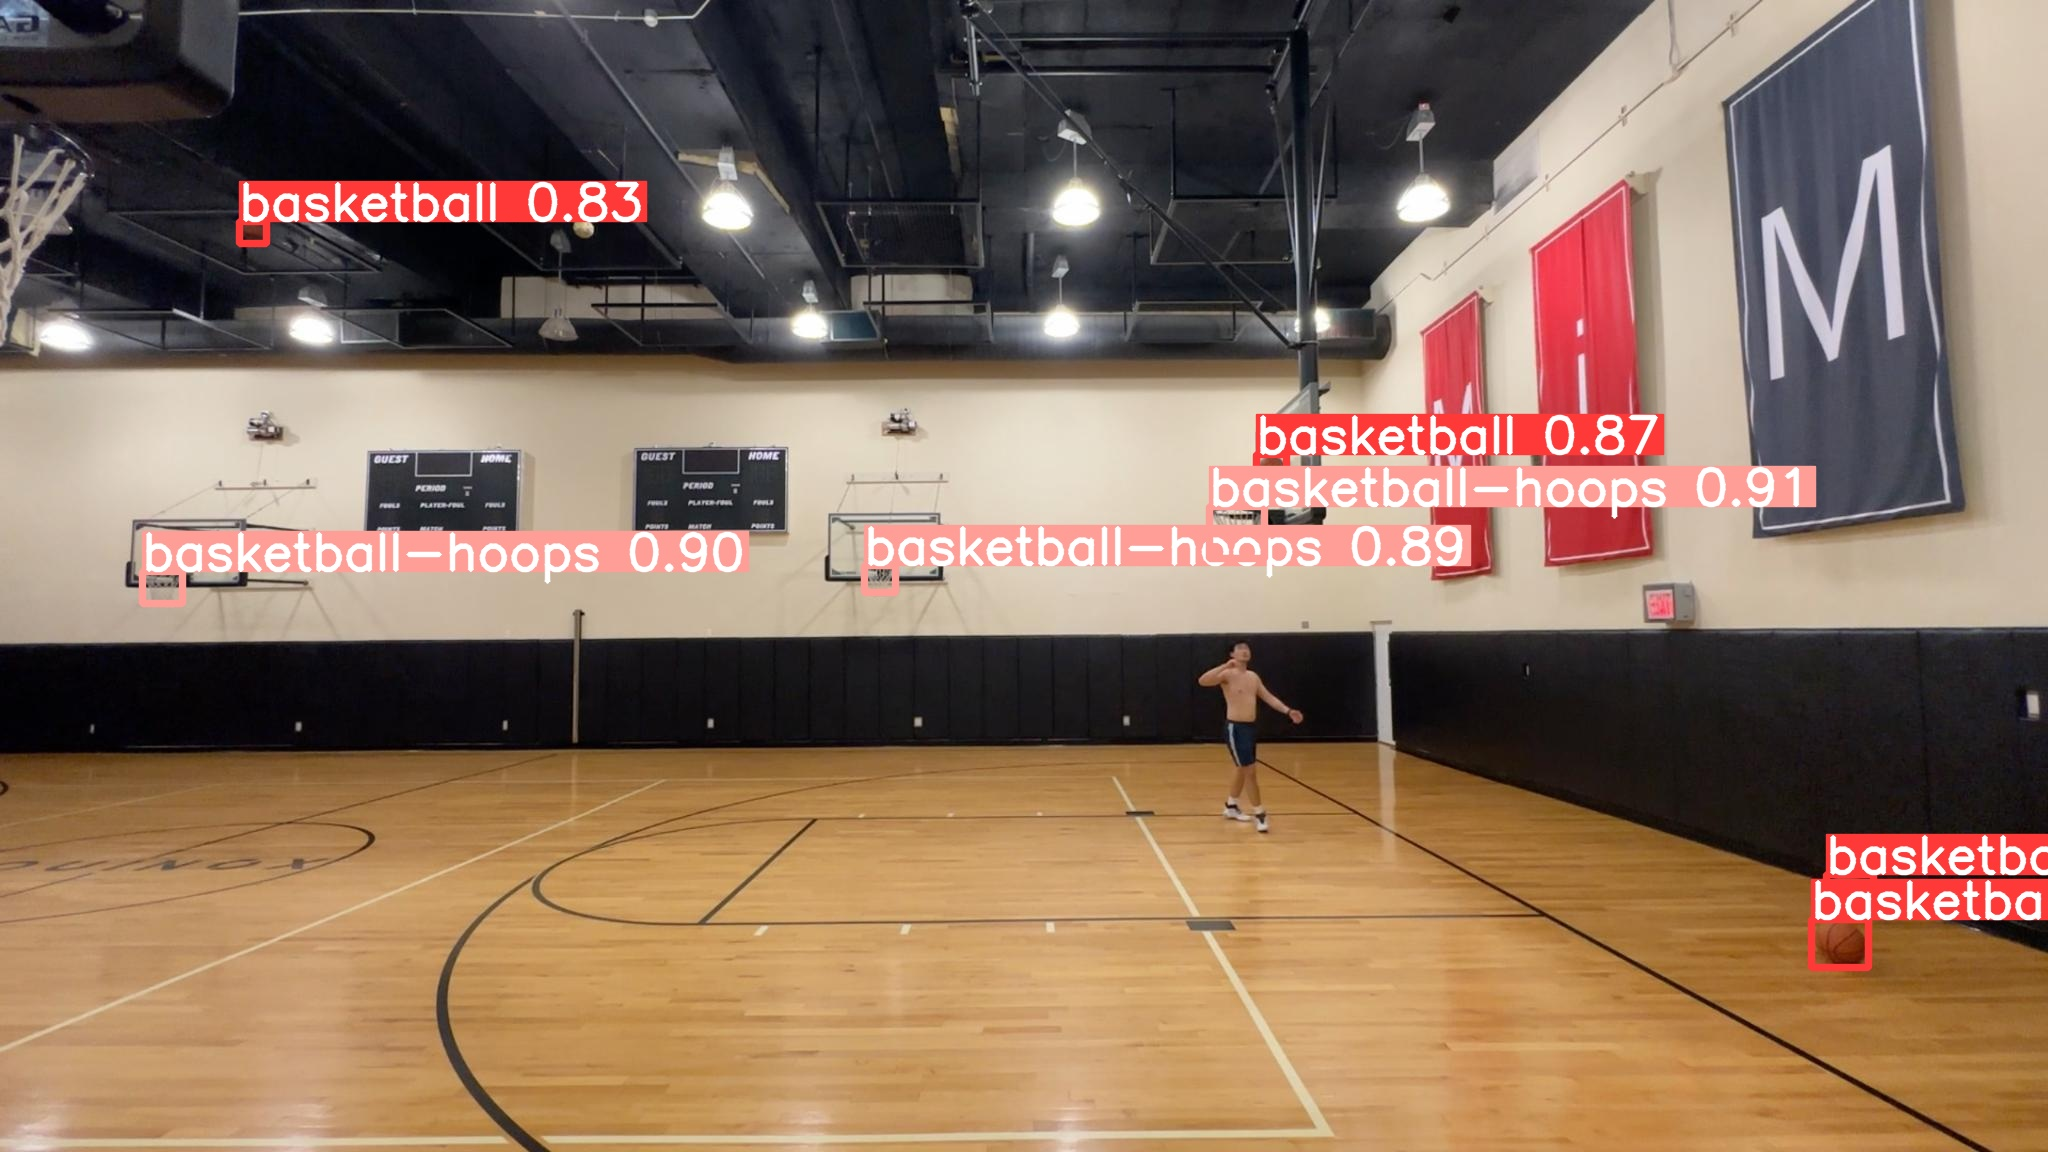

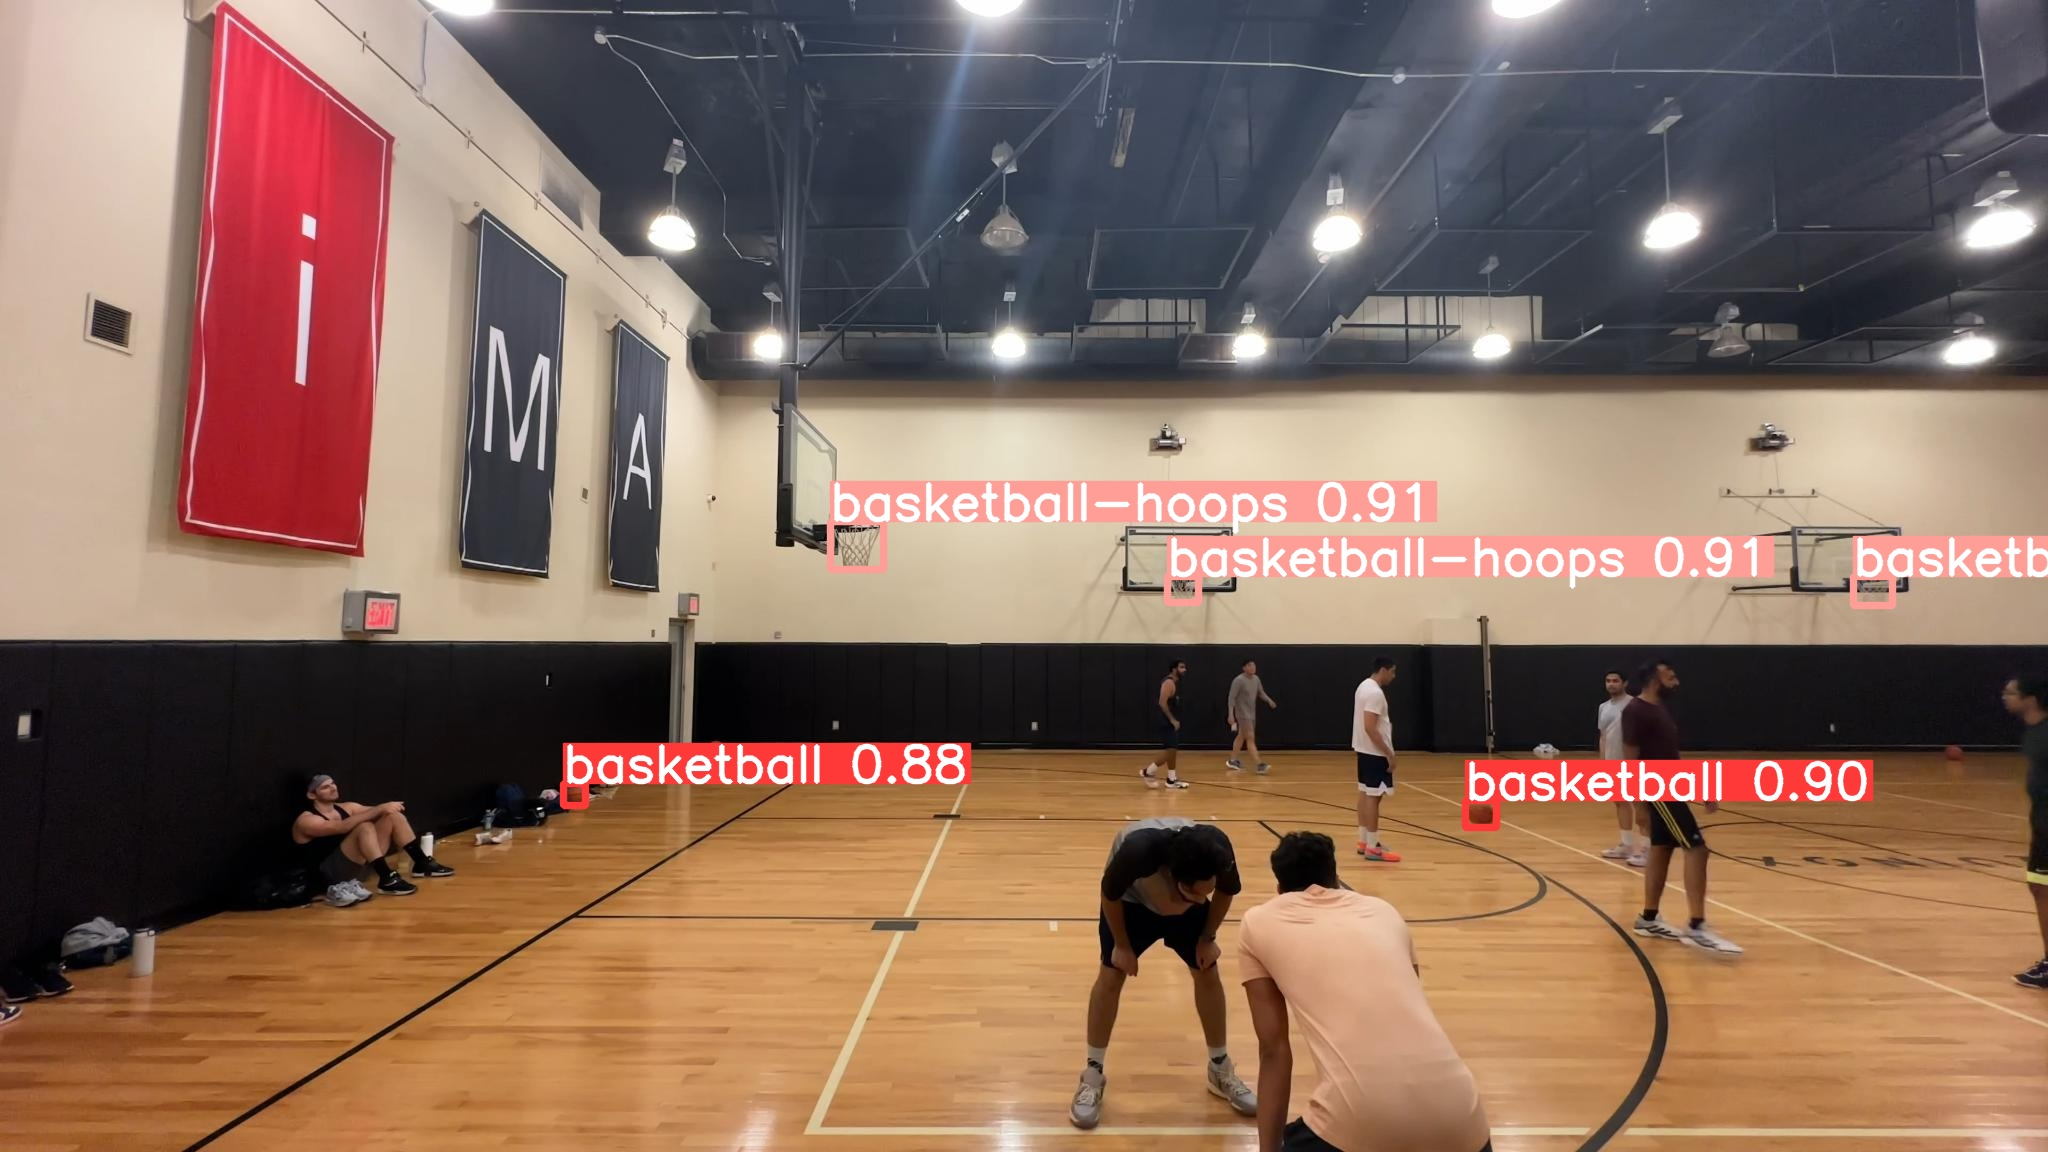

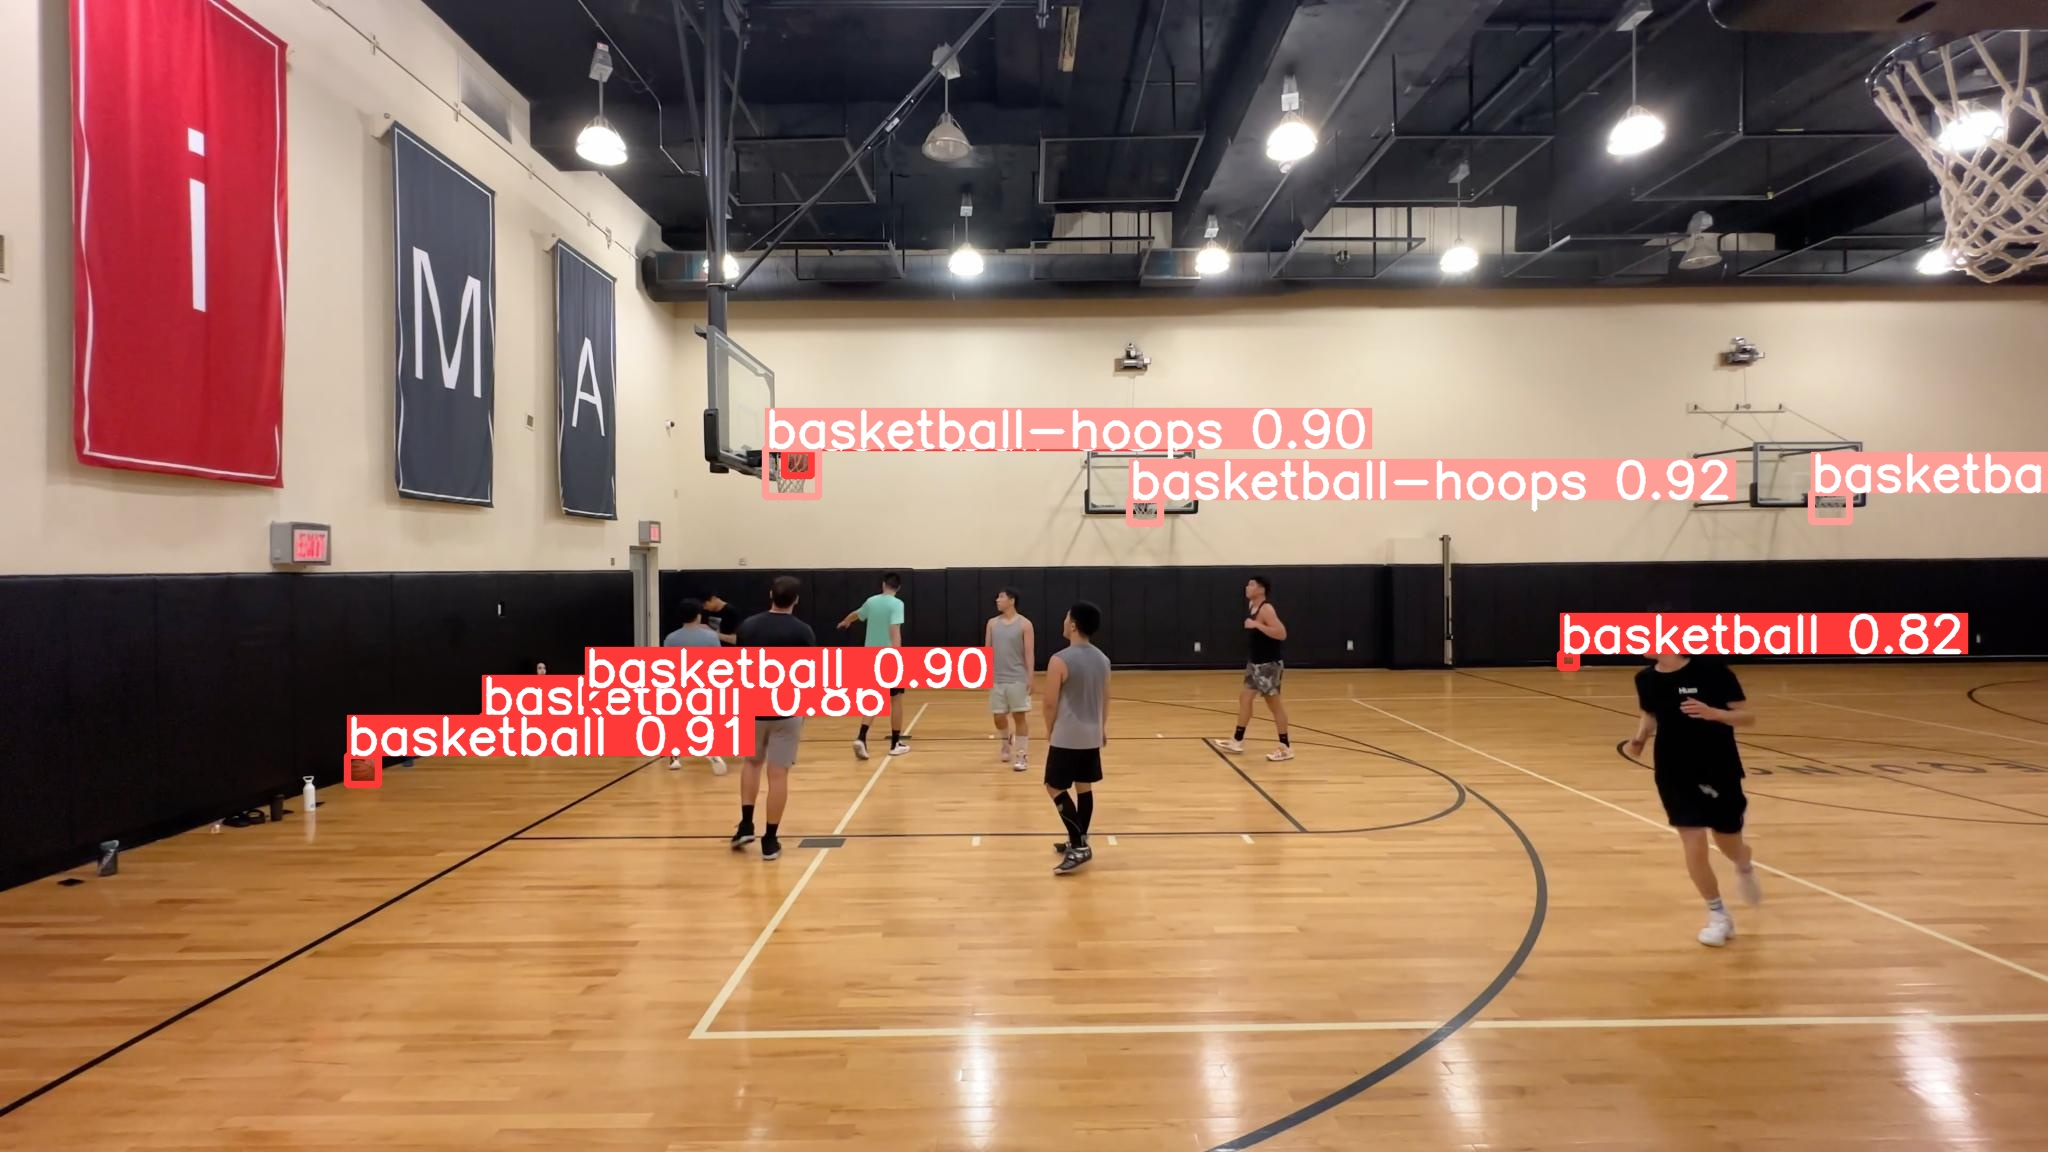

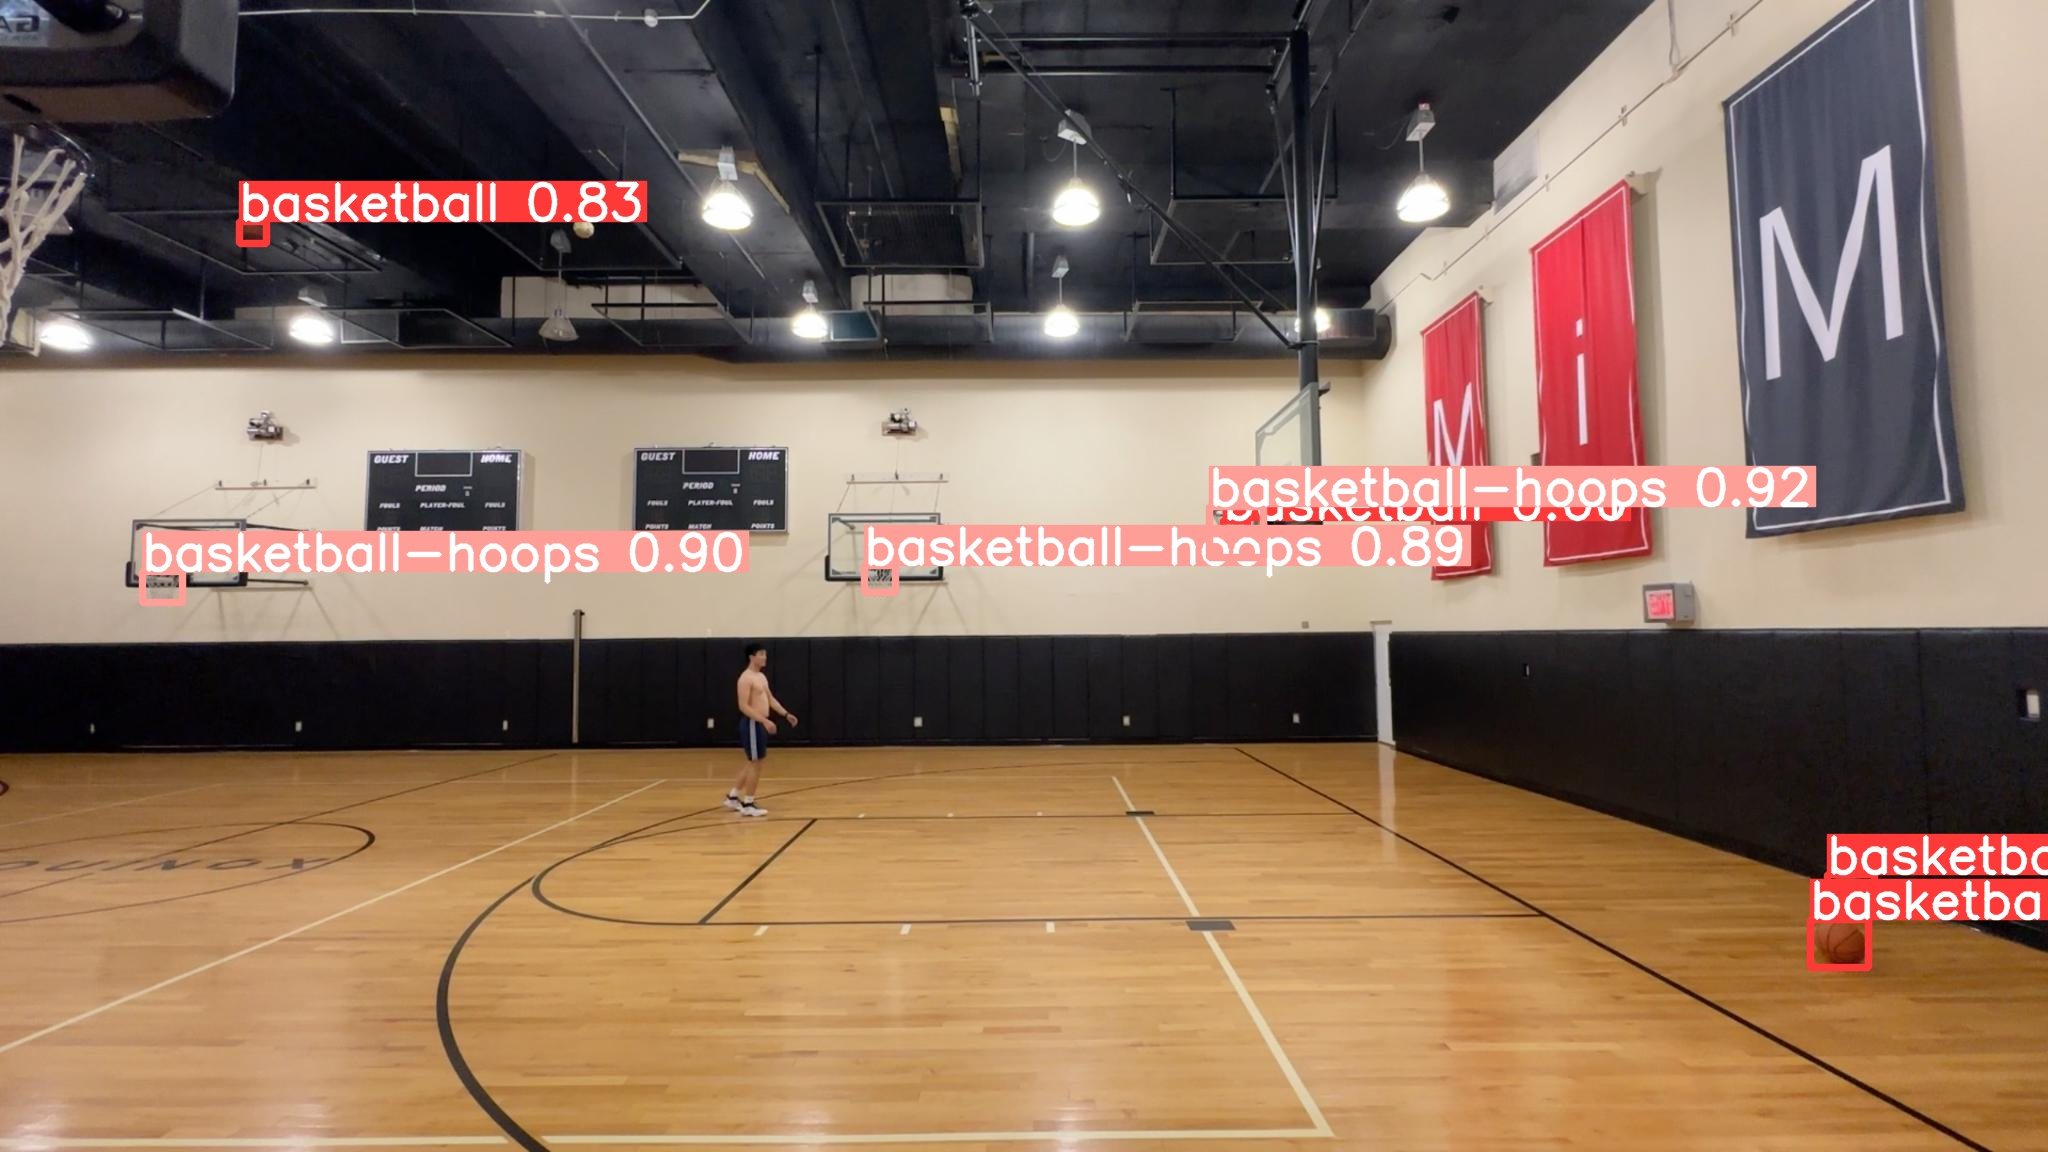

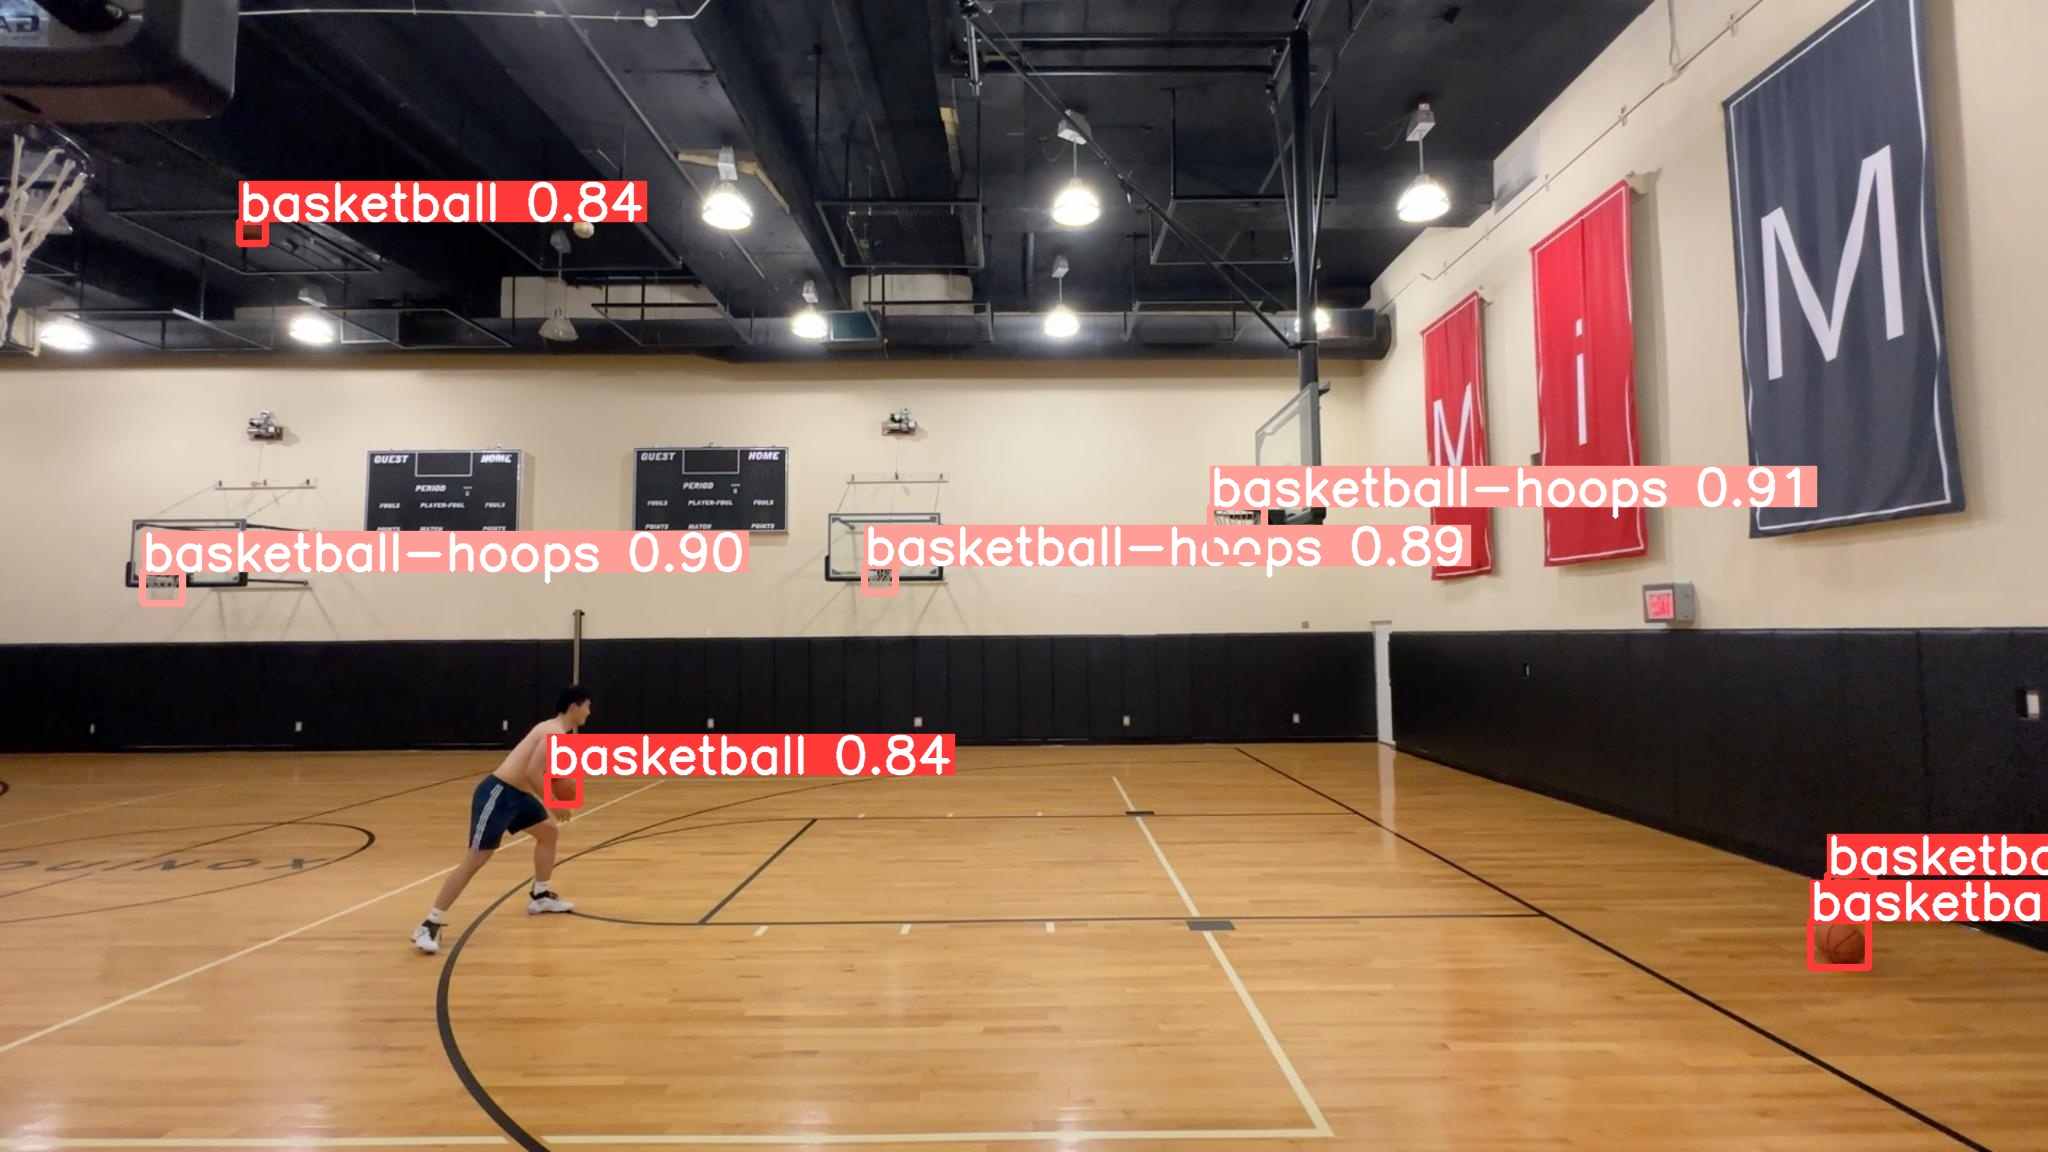

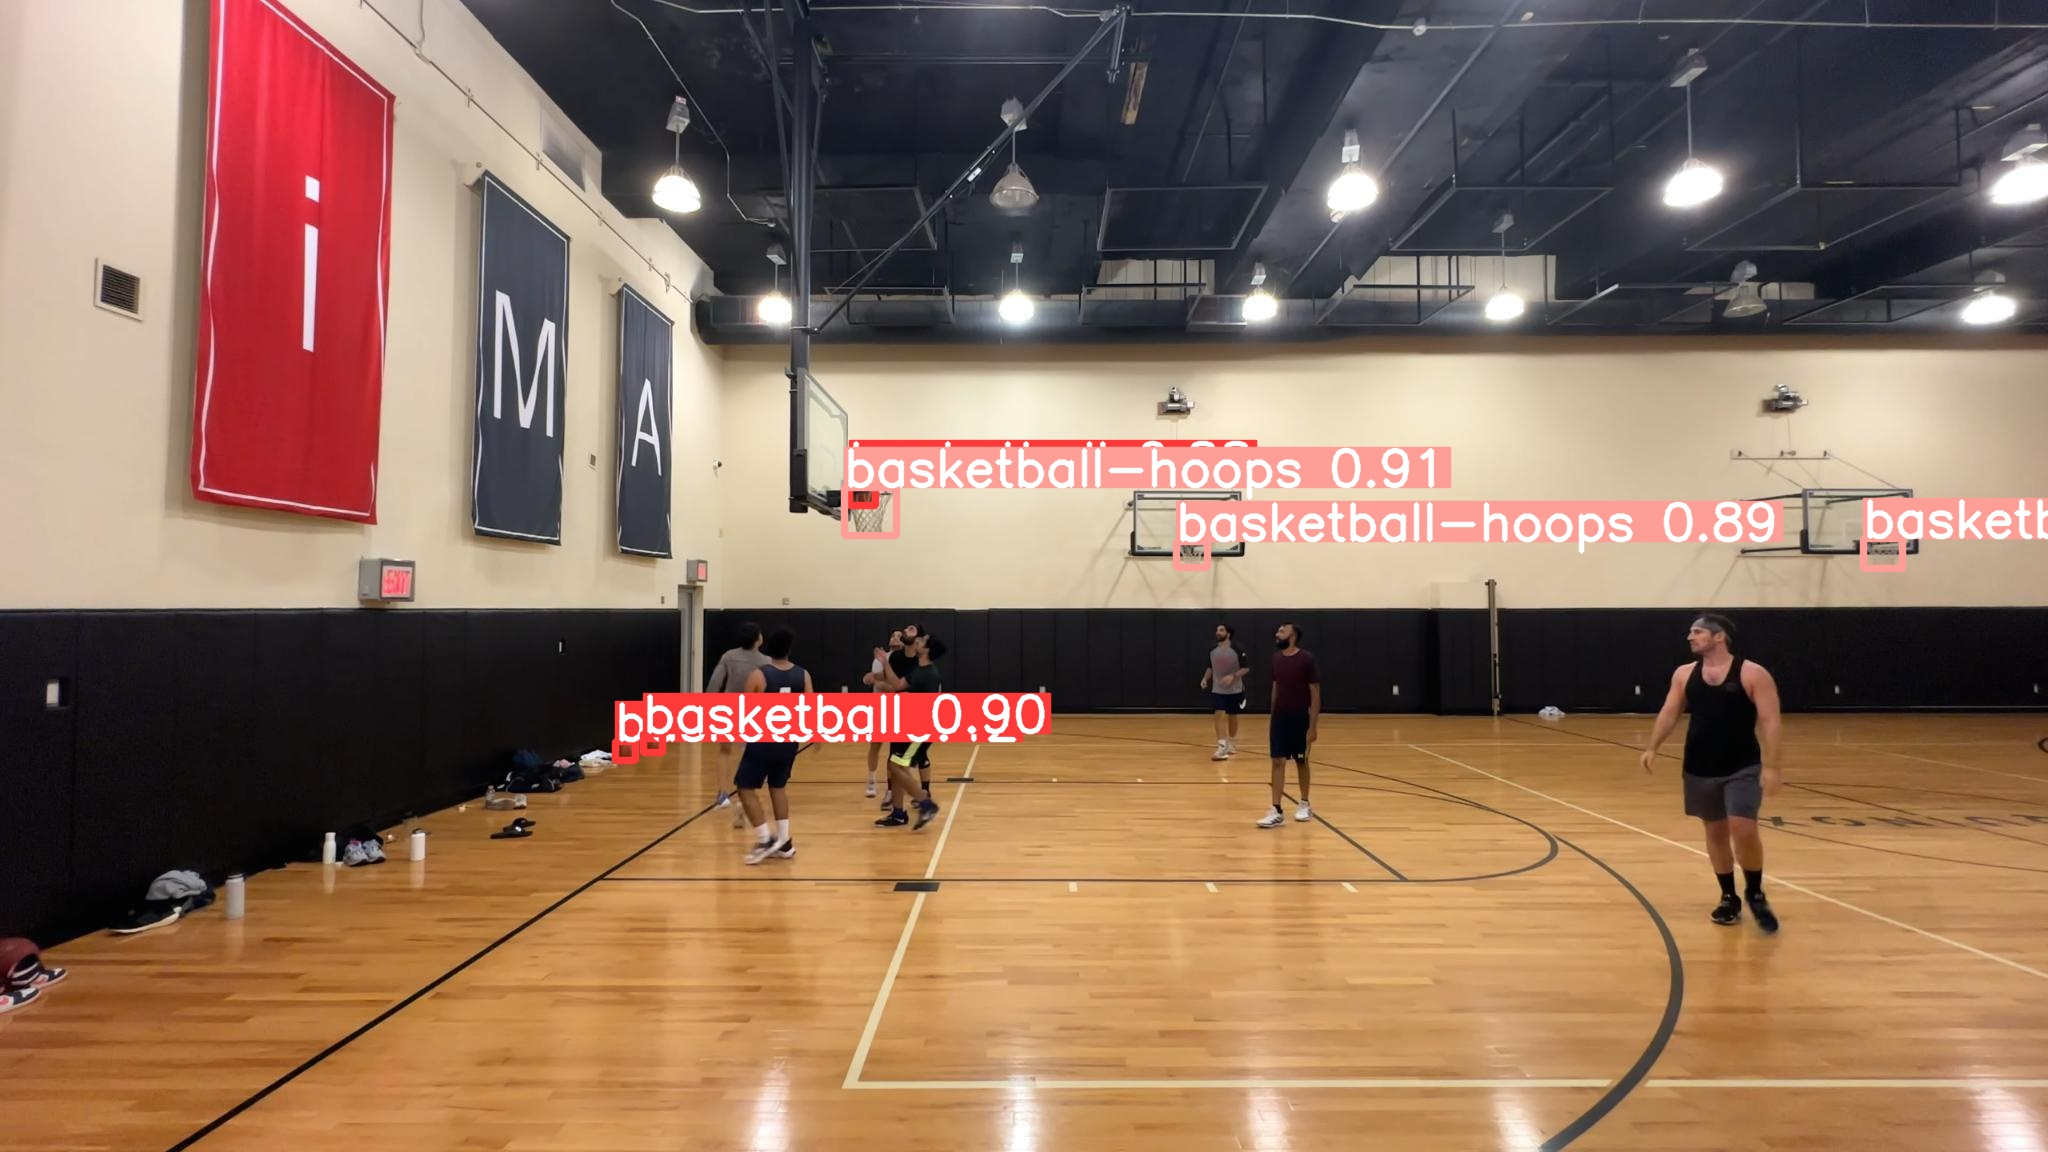

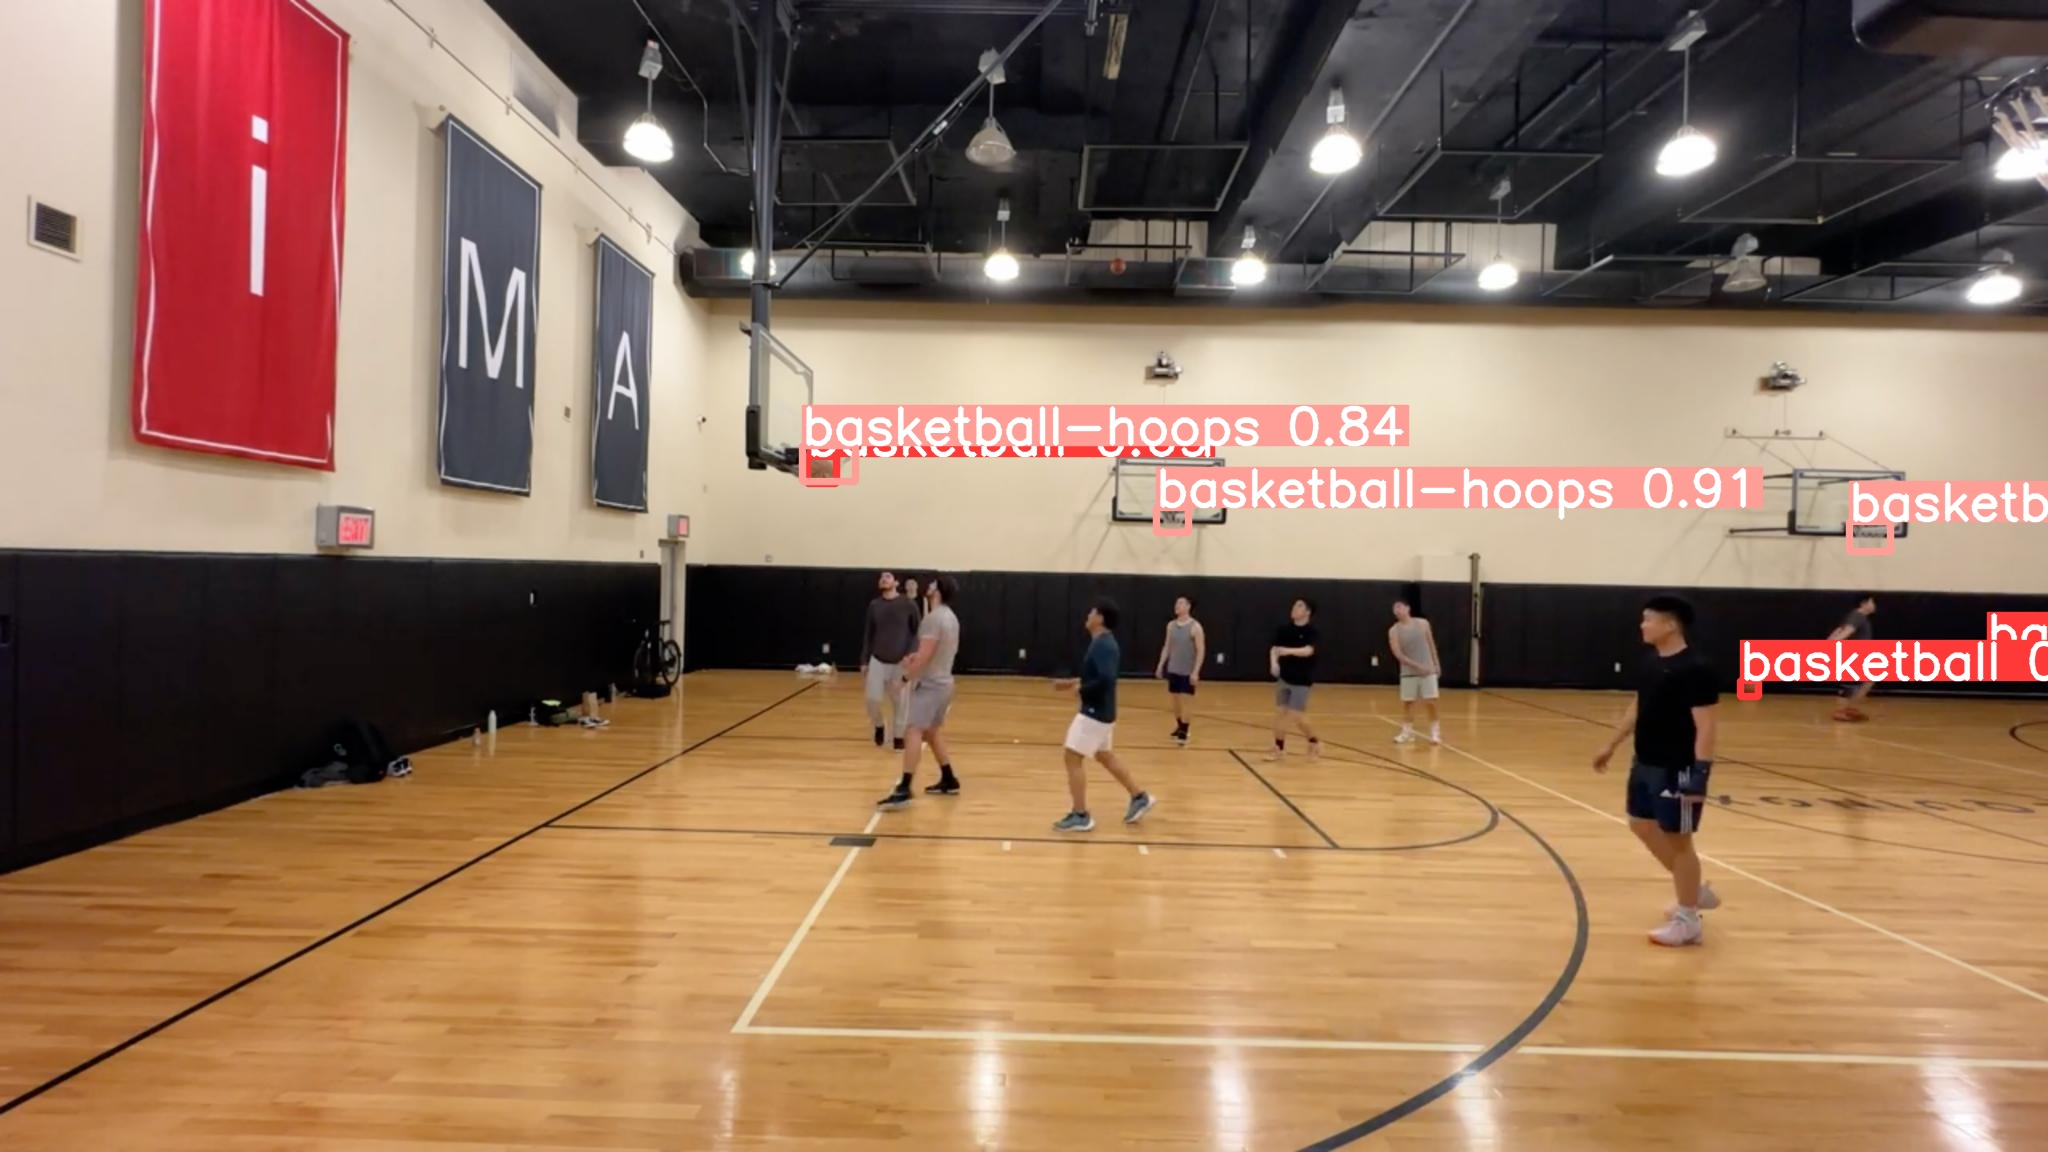

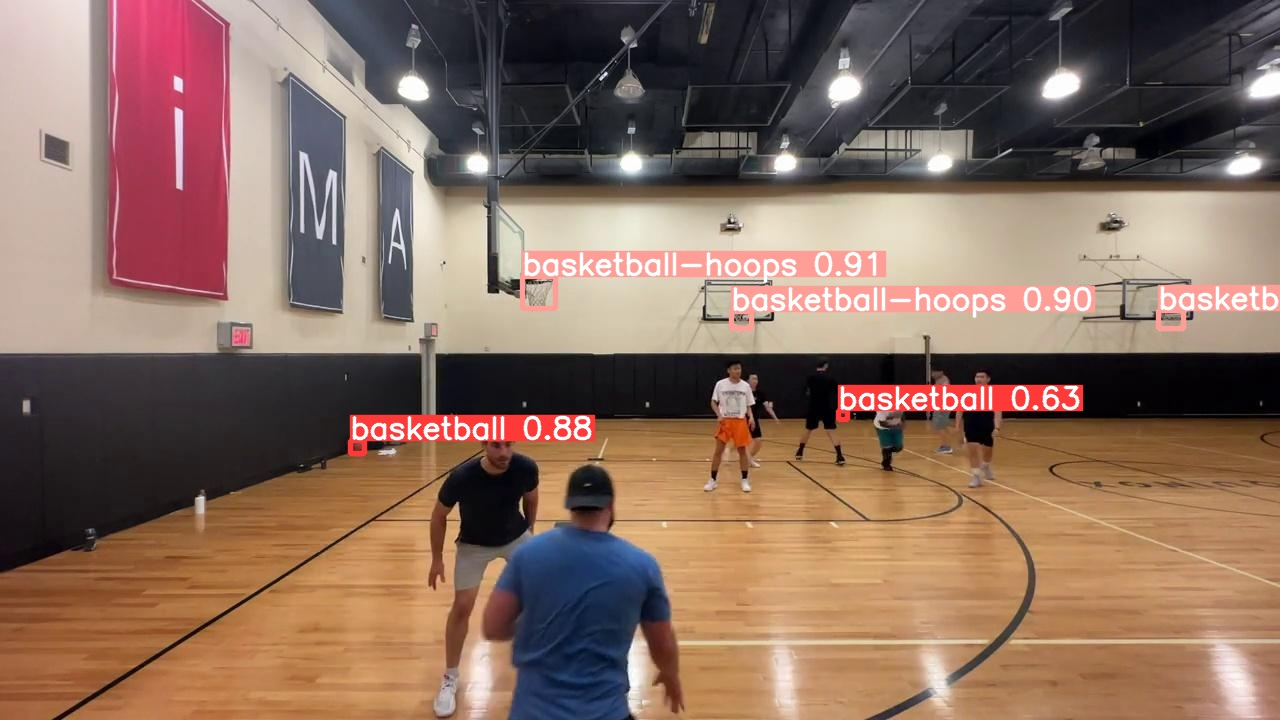

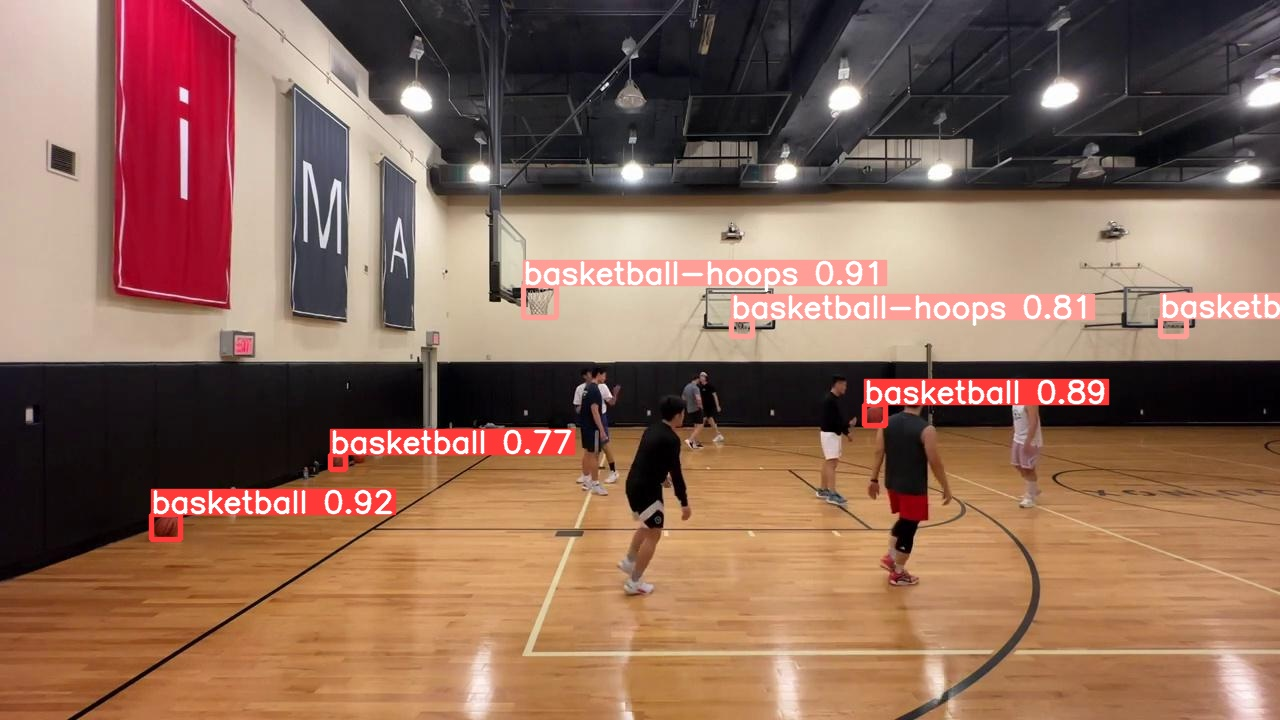

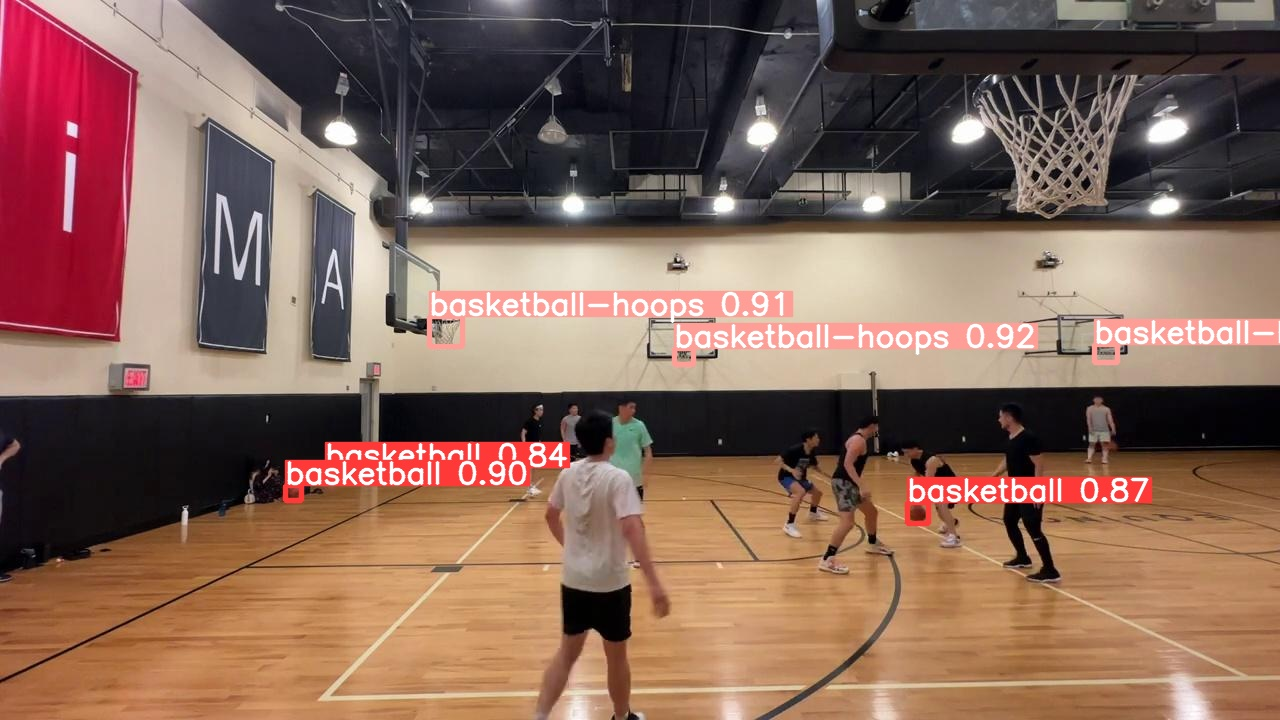

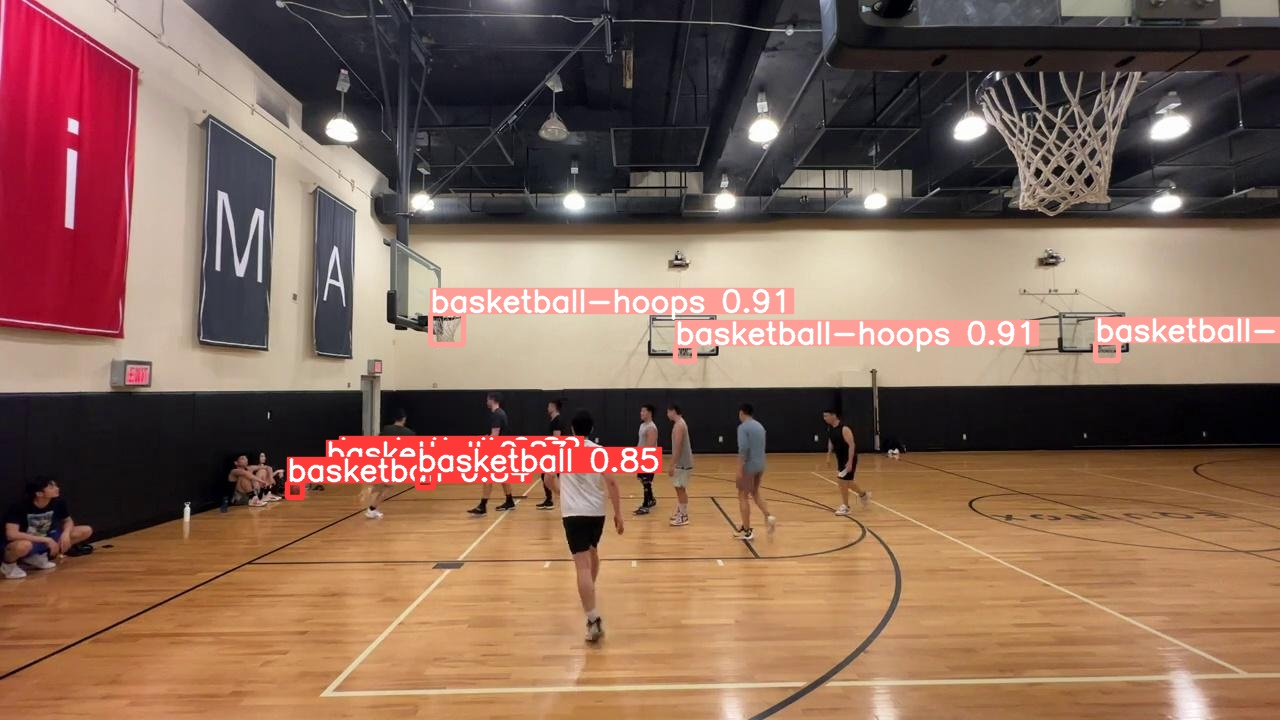

In [28]:
i = 0
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg'):
      if i == 15:
          break
      display(Image(filename=image_path, width=1000))
      print("\n")
      i += 1